In [231]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math; import re
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point; from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr; from scipy.interpolate import griddata
from matplotlib.path import Path; from numpy import nan; import gsw
import matplotlib as mpl

In [484]:
# Polygon_x (NMAB)
t_usable=  [129, 576, 644, 272, 267, 240, 155, 321, 629, 360, 336, 41]
t_countwithinpolygon=  [147, 663, 1000, 341, 363, 389, 299, 449, 938, 460, 405, 68]
t_diff=  [18, 87, 356, 69, 96, 149, 144, 128, 309, 100, 69, 27]

t_abs_mean=  [43.41860465116279, 41.03993055555556, 33.31211180124224, 30.919117647058822, 12.348314606741573, 9.825, 7.445161290322581, 8.98753894080997, 16.931637519872815, 25.469444444444445, 35.142857142857146, 41.46341463414634]
t_abs_std=  [17.336477506015097, 19.973944903177678, 20.491714183998386, 19.259854294795364, 9.386939436840436, 6.871635540393568, 2.0764173099242775, 5.050508180767321, 8.45224689681372, 12.905604283162422, 16.937660810793698, 13.837202524575815]
t_abs_max=  [86.0, 107.0, 103.0, 85.0, 57.0, 58.0, 16.0, 45.0, 56.0, 65.0, 157.0, 66.0]
t_abs_min=  [10.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 13.0]
t_abs_q25=  [31.0, 25.0, 16.0, 14.0, 7.0, 6.0, 6.0, 6.0, 11.0, 15.0, 24.0, 31.0]
t_abs_q75=  [57.0, 55.0, 48.25, 43.25, 14.0, 11.0, 9.0, 10.0, 21.0, 34.25, 45.0, 50.0]

t_abs_c_mean=  [52.67151014328273, 41.45218256773642, 32.33645888646196, 33.865309571893626, 11.241295075552504, 10.655513336277266, 7.337869769119768, 8.851221970364168, 16.988462024560818, 25.924006816407804, 35.87996745695565, 38.08998968008256]
t_abs_c_std=  [17.528539880468568, 9.544260348502783, 10.516153002359076, 12.33908122733314, 3.8760570892136963, 4.826613271052373, 0.8470430142847104, 2.2639573327781517, 4.522371663473388, 6.548672862360122, 6.50835255409061, 9.971191434194013]
t_abs_c_max=  [79.0, 58.166666666666664, 49.77777777777778, 67.0, 18.38095238095238, 26.5, 9.142857142857142, 15.105263157894736, 25.62962962962963, 38.4, 48.72727272727273, 50.76470588235294]
t_abs_c_min=  [30.375, 19.433333333333334, 13.421052631578947, 15.076923076923077, 6.4, 5.0, 5.8, 6.333333333333333, 9.857142857142858, 13.416666666666666, 26.22222222222222, 26.4]
t_abs_c_q25=  [41.925943396226415, 34.421052631578945, 23.133333333333333, 25.585714285714285, 7.697115384615385, 7.16, 6.845833333333332, 7.0, 13.642316017316018, 23.642857142857142, 29.3125, 31.75263157894737]
t_abs_c_q75=  [65.94736842105263, 47.72463768115942, 38.67567567567568, 41.25, 13.41086956521739, 11.4, 7.85, 9.466954022988507, 20.32391304347826, 30.071428571428573, 40.333333333333336, 43.93498452012384]

t_ratio_mean=  [0.6754611128679662, 0.6290000720937612, 0.5853654400808361, 0.507385497959194, 0.23155750852502993, 0.18665593005566458, 0.1338510731748397, 0.1498641189987851, 0.3357953085583843, 0.40635440682504337, 0.625160411443775, 0.7544275002827671]
t_ratio_std=  [0.30315703909020386, 0.3269294714371446, 0.34242989966128845, 0.34417895099829215, 0.233899158853928, 0.1821696620470467, 0.04876976179618971, 0.11220772841425594, 0.24848524617308793, 0.2805277847254265, 0.3177803186626149, 0.3102360129859529]
t_ratio_max=  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2926829268292683, 1.0, 1.0, 1.0, 1.0, 1.0]
t_ratio_min=  [0.0847457627118644, 0.03571428571428571, 0.03496503496503497, 0.02577319587628866, 0.026595744680851064, 0.029069767441860465, 0.03067484662576687, 0.03597122302158273, 0.025380710659898477, 0.03205128205128205, 0.046153846153846156, 0.1262135922330097]
t_ratio_q25=  [0.4691358024691358, 0.3333333333333333, 0.26779426559356134, 0.2037037037037037, 0.09796081567373051, 0.09433962264150944, 0.09740670461733081, 0.09433962264150944, 0.1595744680851064, 0.18604651162790697, 0.3318965517241379, 0.5921052631578947]
t_ratio_q75=  [1.0, 1.0, 1.0, 1.0, 0.23809523809523808, 0.19754098360655736, 0.16100230414746544, 0.16981132075471697, 0.4186046511627907, 0.5494204425711275, 1.0, 1.0]

t_ratio_c_mean=  [0.6643992270781768, 0.6395963135070405, 0.5959725457149417, 0.5459133599846864, 0.208238903961004, 0.2063361119737348, 0.12800415925161845, 0.14722368085659104, 0.3398606995337861, 0.42760155849775744, 0.6347509921936197, 0.680387216447591]
t_ratio_c_std=  [0.10668558897359602, 0.12611304363888615, 0.16142351593987933, 0.16248482368281048, 0.07722261338615623, 0.10407565313131285, 0.02689621418519955, 0.04825704958335025, 0.10455114380883745, 0.16896972212631467, 0.1075109217839321, 0.16665374608566721]
t_ratio_c_max=  [0.766701176775718, 0.8663739837398374, 1.0, 0.8913857677902621, 0.36963570926435624, 0.5482162764771461, 0.1914993459345246, 0.28616407420132867, 0.5859301745573577, 0.9055335968379445, 0.8271805941693703, 0.8096685842494958]
t_ratio_c_min=  [0.42297006955871996, 0.3478986997138998, 0.26495368103426564, 0.3, 0.11152708601199234, 0.09981503767606639, 0.08819491875124505, 0.07608695652173914, 0.20133719678002118, 0.2313760258923664, 0.4439686234233752, 0.44508618981573206]
t_ratio_c_q25=  [0.6657775998211365, 0.5396542068965061, 0.5078965872562121, 0.4048297213250407, 0.1344826386548233, 0.14066006755441052, 0.11505643141249525, 0.11592781288978601, 0.26379630443717317, 0.28465067738370387, 0.5458269854293081, 0.6157465325466387]
t_ratio_c_q75=  [0.7256536370026545, 0.7143053433016296, 0.6954300906359904, 0.6317474876409521, 0.25130325021750854, 0.2478829239205564, 0.1503085299279813, 0.16151118015239183, 0.3960026863429826, 0.4725717988688557, 0.7151831180730783, 0.7980377297635206]

In [560]:
d_usable_x=  [130, 569, 628, 268, 249, 207, 116, 260, 591, 347, 330, 41]

In [485]:
# Polygon_x (NMAB)
d_usable=  [130, 569, 628, 268, 249, 207, 116, 260, 591, 347, 330, 41]
d_countwithinpolygon=  [147, 663, 1000, 341, 363, 389, 299, 449, 938, 460, 405, 68]
d_diff=  [17, 94, 372, 73, 114, 182, 183, 189, 347, 113, 75, 27]

d_abs_mean=  [44.261538461538464, 38.13005272407733, 27.794585987261147, 25.682835820895523, 10.152610441767068, 9.304347826086957, 6.887931034482759, 8.388461538461538, 14.346869712351946, 22.29394812680115, 30.496969696969696, 41.78048780487805]
d_abs_std=  [18.027566005833247, 20.655019607128388, 19.46475262859222, 15.545556672458767, 6.7859412913530415, 5.9942911999775355, 1.972970592979277, 5.002216964128307, 7.789955321237922, 12.635663504275293, 15.551526960953499, 14.304207457302853]
d_abs_max=  [93.0, 107.0, 96.0, 84.0, 49.0, 42.0, 14.0, 45.0, 57.0, 60.0, 78.0, 66.0]
d_abs_min=  [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0]
d_abs_q25=  [30.25, 20.0, 12.0, 12.0, 6.0, 6.0, 5.0, 5.75, 8.0, 11.0, 18.25, 33.0]
d_abs_q75=  [57.0, 54.0, 41.0, 35.0, 12.0, 10.5, 8.0, 9.0, 18.0, 30.5, 40.0, 52.0]

d_abs_c_mean=  [48.66135129490393, 38.98122621961879, 27.10194874447916, 28.460179789080648, 9.626018246655864, 10.150006455633443, 6.814348672161172, 8.08471531822151, 14.199875849819259, 22.34921729247595, 31.106949119712848, 39.603508771929825]
d_abs_c_std=  [11.401730026343996, 11.501141698557191, 10.934267582203343, 9.288503262806348, 2.6061400288919603, 4.002149380268777, 0.8460055436177472, 2.2926864545875265, 4.353555908629032, 5.338934802635864, 7.230314123112538, 8.27543543509976]
d_abs_c_max=  [70.0, 59.8421052631579, 55.1, 55.0, 14.666666666666666, 22.333333333333332, 8.333333333333334, 14.764705882352942, 25.03846153846154, 30.0, 48.8235294117647, 51.0]
d_abs_c_min=  [31.5625, 13.857142857142858, 11.0, 15.583333333333334, 6.25, 5.5, 5.333333333333333, 5.0, 8.714285714285714, 11.833333333333334, 18.5, 31.6]
d_abs_c_q25=  [43.08611111111111, 34.12903225806452, 19.0, 22.40833333333333, 7.197435897435898, 7.163043478260869, 6.357692307692308, 6.326666666666666, 10.521306818181818, 19.96551724137931, 26.434782608695652, 33.90526315789474]
d_abs_c_q75=  [54.421052631578945, 49.666666666666664, 32.72222222222222, 32.636160714285715, 11.128623188405797, 11.375, 7.240625, 8.666666666666666, 17.028409090909093, 26.055555555555557, 35.76470588235294, 43.60526315789474]

d_ratio_mean=  [0.6965398430371553, 0.5716224459524574, 0.4561770700831625, 0.3953285454475228, 0.1809896436480022, 0.17639235331140532, 0.12201248928001883, 0.14098123367664345, 0.28158152156193156, 0.3488094870314341, 0.5077711268393423, 0.7399163170204794]
d_ratio_std=  [0.3131533944938912, 0.33427699850109843, 0.31257199020260984, 0.2779307572777819, 0.16936413704699307, 0.17022234866526426, 0.04719266462154916, 0.11550855949593565, 0.20779508681686693, 0.25929948769683087, 0.2968924939261113, 0.31348279931181583]
d_ratio_max=  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.27586206896551724, 1.0, 1.0, 1.0, 1.0, 1.0]
d_ratio_min=  [0.0625, 0.03571428571428571, 0.025380710659898477, 0.02577319587628866, 0.026595744680851064, 0.029069767441860465, 0.03067484662576687, 0.03597122302158273, 0.025380710659898477, 0.0273224043715847, 0.034482758620689655, 0.1]
d_ratio_q25=  [0.45513322884012536, 0.2627118644067797, 0.19170795686388808, 0.18136363636363634, 0.08928571428571429, 0.09053651266766022, 0.0847457627118644, 0.08676911544227886, 0.13134999631349997, 0.16345083487940631, 0.2608695652173913, 0.5128205128205128]
d_ratio_q75=  [1.0, 1.0, 0.6739332096474953, 0.5440058479532164, 0.20512820512820512, 0.18350340136054422, 0.14532930107526884, 0.15741978609625668, 0.36576576576576575, 0.45553359683794464, 0.7158848614072495, 1.0]

d_ratio_c_mean=  [0.6411719517008103, 0.5914758138888861, 0.45590372907659243, 0.4462097227536974, 0.1701975887987377, 0.18947829338976746, 0.11913560634511647, 0.1372998209456863, 0.2828467462617923, 0.36369703706206946, 0.5221549102933548, 0.6823632389895118]
d_ratio_c_std=  [0.1417868569300309, 0.16194492083990955, 0.15172708451385097, 0.14301271960908957, 0.05076585690365435, 0.09833366839811226, 0.025341024609078566, 0.05065565770207912, 0.0990201953584372, 0.13601869587373797, 0.12771072205247488, 0.1350193224424036]
d_ratio_c_max=  [0.8122963414109939, 0.8566654780205877, 0.9246753246753245, 0.7470588235294118, 0.2609250398724083, 0.5108279193736465, 0.17008644473068266, 0.2854547744427033, 0.5576051369291471, 0.7059288537549409, 0.7397455627276875, 0.8100664253187024]
d_ratio_c_min=  [0.43333333333333335, 0.185016508709988, 0.1956620146868166, 0.22913870972650208, 0.08851206403947232, 0.06928549334982988, 0.0768358637601146, 0.06521739130434782, 0.1554418244615193, 0.17966870423521886, 0.3252811846444965, 0.495571626708936]
d_ratio_c_q25=  [0.5294846103100915, 0.5151677012434108, 0.35991859997678277, 0.33542692355906095, 0.1275251848722779, 0.14103783715811113, 0.10435496686629674, 0.10251574631804716, 0.2220311711464666, 0.2767976328783381, 0.42396532528276804, 0.6185116458249165]
d_ratio_c_q75=  [0.7515184411570031, 0.6947605038454416, 0.5439024390243903, 0.5268244974993401, 0.2109278673599284, 0.20182503138597208, 0.13405101495514082, 0.15791465104316352, 0.3212939704763311, 0.41850059036639786, 0.5976473255429251, 0.7757590451297997]

In [588]:
print(d_abs_c_std[0:2])
print(d_abs_c_std[5:8])

[11.401730026343996, 11.501141698557191]
[4.002149380268777, 0.8460055436177472, 2.2926864545875265]


In [486]:
t_abs_c_mean_x=  [52.67151014328273, 41.45218256773642, 32.33645888646196, 33.865309571893626, 11.241295075552504, 10.655513336277266, 7.337869769119768, 8.851221970364168, 16.988462024560818, 25.924006816407804, 35.87996745695565, 38.08998968008256]
t_abs_c_std_x=  [17.528539880468568, 9.544260348502783, 10.516153002359076, 12.33908122733314, 3.8760570892136963, 4.826613271052373, 0.8470430142847104, 2.2639573327781517, 4.522371663473388, 6.548672862360122, 6.50835255409061, 9.971191434194013]
d_abs_c_mean_x=  [48.66135129490393, 38.98122621961879, 27.10194874447916, 28.460179789080648, 9.626018246655864, 10.150006455633443, 6.814348672161172, 8.08471531822151, 14.199875849819259, 22.34921729247595, 31.106949119712848, 39.603508771929825]
d_abs_c_std_x=  [11.401730026343996, 11.501141698557191, 10.934267582203343, 9.288503262806348, 2.6061400288919603, 4.002149380268777, 0.8460055436177472, 2.2926864545875265, 4.353555908629032, 5.338934802635864, 7.230314123112538, 8.27543543509976]

In [469]:
import scipy.stats

scipy.stats.pearsonr(t_abs_c_mean, d_abs_c_mean)[0]

0.9904526444039307

In [449]:
abs_c_diff = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_mean, d_abs_c_mean)])
abs_c_diff_std = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_std, d_abs_c_std)])

print(abs_c_diff)
print(np.mean(abs_c_diff))
print(np.min(abs_c_diff))
print(np.max(abs_c_diff))

[ 4.01015885  2.47095635  5.23451014  5.40512978  1.61527683  0.50550688
  0.5235211   0.76650665  2.78858617  3.57478952  4.77301834 -1.51351909]
2.51287012700024
-1.5135190918472645
5.405129782812978


In [402]:
mag_std = np.asarray([x1 / x2 for (x1, x2) in zip(d_abs_std, d_abs_c_std)])
print(np.mean(mag_std))

1.956814037465023


In [395]:
amp = 48.66135129490393 - 6.814348672161172
print(amp)
ampstd = 11.401730026343996 + 0.8460055436177472
print(ampstd)

41.84700262274276
12.247735569961744


In [424]:
print(np.max(d_ratio_c_mean))
print(np.min(d_ratio_c_mean))

new = np.max(d_ratio_c_mean) - np.min(d_ratio_c_mean)
print(new)

0.6823632389895118
0.11913560634511647
0.5632276326443953


In [470]:
# Polygon_v (SMAB)
t_usable=  [145, 829, 1199, 129, 368, 323, 508, 478, 1200, 108, 371]
t_countwithinpolygon=  [169, 1178, 2035, 174, 649, 508, 818, 728, 1982, 174, 572]
t_diff=  [24, 349, 836, 45, 281, 185, 310, 250, 782, 66, 201]

t_abs_mean=  [42.93793103448276, 40.452352231604344, 31.57464553794829, 32.51162790697674, 10.02445652173913, 8.368421052631579, 8.251968503937007, 9.006276150627615, 14.344166666666666, 27.175925925925927, 29.560646900269543]
t_abs_std=  [20.533646295827253, 25.573125781951795, 21.791089938035093, 22.092517334068575, 6.443057413609331, 3.1648015284304236, 2.920113534458225, 3.176463248477639, 7.051882678090692, 12.020683335250325, 14.085356415430676]
t_abs_max=  [110.0, 165.0, 195.0, 103.0, 53.0, 21.0, 30.0, 22.0, 51.0, 56.0, 86.0]
t_abs_min=  [6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
t_abs_q25=  [30.0, 21.0, 15.0, 15.0, 6.0, 6.0, 6.0, 7.0, 9.0, 17.0, 19.0]
t_abs_q75=  [57.0, 54.0, 42.0, 44.0, 12.0, 10.0, 10.0, 11.0, 18.0, 36.25, 38.0]

t_abs_c_mean=  [43.353638953638956, 40.13457474854354, 32.00730245357875, 34.793985095364405, 10.012433006223366, 7.907736842579605, 7.764460669914881, 8.955247839114621, 14.232322181455475, 24.6966039707419, 29.917972637048216]
t_abs_c_std=  [6.308167856206571, 9.11289139767773, 6.878673133404334, 10.652666241707898, 3.1815265927093406, 1.3130896266947265, 1.5433648692019653, 1.4717621781321175, 2.377909348274622, 7.914526325922757, 4.869746963103676]
t_abs_c_max=  [52.333333333333336, 57.54545454545455, 48.421052631578945, 50.30769230769231, 19.333333333333332, 9.87719298245614, 11.0, 12.833333333333334, 20.95744680851064, 36.666666666666664, 42.6]
t_abs_c_min=  [32.166666666666664, 26.666666666666668, 21.96, 19.916666666666668, 6.666666666666667, 5.5, 5.0, 6.444444444444445, 10.127272727272727, 12.0, 20.5]
t_abs_c_q25=  [39.4, 32.53333333333333, 26.1, 30.071428571428573, 8.048387096774194, 7.139423076923077, 6.622222222222222, 8.076923076923077, 12.702127659574469, 17.041666666666664, 26.20299145299145]
t_abs_c_q75=  [50.4, 45.68421052631579, 34.26470588235294, 42.95, 10.681818181818182, 8.837837837837839, 8.51923076923077, 10.113636363636363, 15.833333333333334, 29.666666666666664, 33.0479302832244]

t_ratio_mean=  [0.6404058490774899, 0.6329117112080105, 0.578494200912532, 0.5797882626252321, 0.19361398730940294, 0.1728804175599901, 0.14724057396250392, 0.1679695540933002, 0.294242250909912, 0.462536322197769, 0.6374499997625321]
t_ratio_std=  [0.3087253915596791, 0.3348367401211088, 0.3510374575552389, 0.365766492146313, 0.14425437864817306, 0.08920312493744789, 0.06904922308897796, 0.09487288863541685, 0.231686583739777, 0.28016393971589937, 0.333057206315766]
t_ratio_max=  [1.0, 1.0, 1.0, 1.0, 1.0, 0.6666666666666666, 0.5084745762711864, 0.6818181818181818, 1.0, 1.0, 1.0]
t_ratio_min=  [0.03314917127071823, 0.03428571428571429, 0.03496503496503497, 0.03597122302158273, 0.037037037037037035, 0.04142011834319527, 0.03424657534246575, 0.030120481927710843, 0.025, 0.07462686567164178, 0.047619047619047616]
t_ratio_q25=  [0.40310077519379844, 0.3153153153153153, 0.23809523809523808, 0.2231404958677686, 0.10736497545008183, 0.11060142711518858, 0.09501347708894878, 0.1, 0.1387820512820513, 0.24156820622986036, 0.30833333333333335]
t_ratio_q75=  [1.0, 1.0, 1.0, 1.0, 0.23224667774086377, 0.2138095238095238, 0.18431174089068825, 0.21052631578947367, 0.36363636363636365, 0.6241217798594848, 1.0]

t_ratio_c_mean=  [0.6239333438311261, 0.6497768413394821, 0.5803426256691495, 0.5699118142132156, 0.20978563823211321, 0.1864316004977491, 0.13171144931013448, 0.17113553072230797, 0.28695343524035893, 0.469009028616092, 0.6547316734292512]
t_ratio_c_std=  [0.10483711526315696, 0.10157138692268304, 0.0951778191036234, 0.16183383013464647, 0.0909126669009889, 0.06384752999636353, 0.045075099408533256, 0.0526447266089522, 0.08704785031873584, 0.20762426794500718, 0.13612750008029686]
t_ratio_c_max=  [0.7641670958549679, 0.872430356974922, 0.7650434172730568, 0.7071958556444207, 0.444965034965035, 0.36, 0.2608926276639476, 0.2760100265508114, 0.6212486005941747, 1.0, 0.8714708561020036]
t_ratio_c_min=  [0.414439582899697, 0.4179003655753309, 0.4277138719592077, 0.2689468221080178, 0.09512637986042478, 0.11123604033306149, 0.04550643420506434, 0.06907138890350205, 0.1635232253980498, 0.17142857142857143, 0.42737806656726884]
t_ratio_c_q25=  [0.5943584746690204, 0.5768888967253056, 0.5088004328808273, 0.5329764585710862, 0.16032133669545018, 0.13957363715235493, 0.0972042558704551, 0.13086484396541131, 0.23491337026141101, 0.35310787610266864, 0.5248505263048018]
t_ratio_c_q75=  [0.6966774773722004, 0.7156296249310331, 0.6407101331839727, 0.674488263243682, 0.2072471788474708, 0.2024467812498989, 0.15351175068259218, 0.20012804467675593, 0.30378493386306565, 0.5539714073041524, 0.7564587840592476]

In [561]:
d_usable_v=  [142, 807, 1154, 127, 312, 274, 373, 401, 1037, 103, 360]

In [589]:
# Polygon_v (SMAB)
d_usable=  [142, 807, 1154, 127, 312, 274, 373, 401, 1037, 103, 360]
d_countwithinpolygon=  [169, 1178, 2035, 174, 649, 508, 818, 728, 1982, 174, 572]
d_diff=  [27, 371, 881, 47, 337, 234, 445, 327, 945, 71, 212]

d_abs_mean=  [42.394366197183096, 38.978934324659235, 27.877816291161178, 24.559055118110237, 9.53525641025641, 7.813868613138686, 7.806970509383378, 7.9351620947630925, 11.562198649951783, 24.097087378640776, 23.625]
d_abs_std=  [24.62820944881361, 27.00604920723857, 22.35369866722058, 17.0074803104038, 6.401525303886962, 2.9007344270570745, 2.750628432545776, 2.7535124765947026, 6.044613801934754, 13.865172239297088, 14.096529813318517]
d_abs_max=  [128.0, 179.0, 195.0, 114.0, 53.0, 20.0, 30.0, 18.0, 48.0, 59.0, 81.0]
d_abs_min=  [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
d_abs_q25=  [23.0, 18.0, 11.0, 12.0, 6.0, 5.0, 5.0, 6.0, 7.0, 13.0, 12.0]
d_abs_q75=  [56.0, 52.0, 38.0, 33.5, 11.0, 9.0, 10.0, 9.0, 15.0, 36.0, 32.25]

d_abs_c_mean=  [41.18097860791826, 39.40649046790143, 27.990836704857966, 25.369307692307693, 9.338449766903913, 7.501564077551284, 7.3946797841023, 7.775943111180119, 11.577268568611348, 21.501907001044934, 23.103191139875538]
d_abs_c_std=  [8.801982286134864, 8.966199617177182, 7.724028550304355, 4.980559843534619, 2.9583612355527196, 1.2461921462057928, 1.3852946095974816, 1.2753362344087815, 2.0306952676415646, 8.409098130683525, 6.8875821017656005]
d_abs_c_max=  [59.5, 63.45454545454545, 44.625, 33.4, 18.0, 9.183673469387756, 10.0, 11.521739130434783, 17.07894736842105, 36.0, 35.15]
d_abs_c_min=  [30.666666666666668, 27.485714285714284, 15.6, 18.36, 6.0, 5.333333333333333, 5.0, 5.714285714285714, 7.638888888888889, 9.0, 11.25]
d_abs_c_q25=  [35.46666666666667, 34.54545454545455, 21.904761904761905, 23.625, 7.830628803245435, 6.6421052631578945, 6.75, 7.222222222222222, 10.69811320754717, 16.225, 17.66]
d_abs_c_q75=  [47.55172413793103, 43.81481481481482, 34.88235294117647, 27.615384615384617, 9.881578947368421, 8.261574074074074, 8.24390243902439, 8.352941176470589, 12.938461538461539, 25.8125, 28.048076923076923]

d_ratio_mean=  [0.6006710919313216, 0.599501420442827, 0.4640480125647104, 0.4126481907084749, 0.1850130780012256, 0.1643713840755686, 0.14077090544857424, 0.14760017736595335, 0.23129311479096037, 0.3659750627602988, 0.49373697894118085]
d_ratio_std=  [0.30466153694572456, 0.34309711639634094, 0.3241350086684818, 0.2931970568400906, 0.14233607239370072, 0.09500240893730962, 0.06345987018721404, 0.084381282190478, 0.18978295789538857, 0.23802284213572436, 0.32684795234582265]
d_ratio_max=  [1.0, 1.0, 1.0, 1.0, 1.0, 0.7142857142857143, 0.5084745762711864, 0.6818181818181818, 1.0, 1.0, 1.0]
d_ratio_min=  [0.06976744186046512, 0.03428571428571429, 0.03205128205128205, 0.042735042735042736, 0.035211267605633804, 0.029585798816568046, 0.03684210526315789, 0.030120481927710843, 0.025, 0.0546875, 0.04081632653061224]
d_ratio_q25=  [0.3486519607843137, 0.2714001327140013, 0.19047619047619047, 0.1570102432778489, 0.10195434105845728, 0.10265837104072398, 0.09090909090909091, 0.09090909090909091, 0.10344827586206896, 0.19727819017320608, 0.20100671140939597]
d_ratio_q75=  [0.876249167221852, 1.0, 0.7186741504854369, 0.5594117647058824, 0.2222222222222222, 0.2, 0.17543859649122806, 0.18867924528301888, 0.29411764705882354, 0.4667065390749601, 0.7534090909090909]

d_ratio_c_mean=  [0.5752090420187004, 0.6253512649877406, 0.4629142904909853, 0.40093013633402697, 0.19533720300596535, 0.18169198616831314, 0.12687584469160013, 0.15048540394663631, 0.22596582995571982, 0.34165862115535434, 0.49399472246984233]
d_ratio_c_std=  [0.08837800488048905, 0.12270001704987507, 0.10900027607758454, 0.08268307404722569, 0.08375424236137761, 0.07109569595952392, 0.03575611180072703, 0.04374706417505024, 0.06289864300214762, 0.12006932179448417, 0.17593536709661242]
d_ratio_c_max=  [0.6784103979756153, 0.9109447675555259, 0.7119941064094255, 0.48507151429595824, 0.41097902097902095, 0.36, 0.22113812177055556, 0.25779277642511234, 0.44058603644132127, 0.4922781395711227, 0.8245376275694865]
d_ratio_c_min=  [0.4421854206186957, 0.41640517302648267, 0.21104106351892785, 0.2631173216228255, 0.09722145092260201, 0.09568438513616462, 0.07530881492508143, 0.057718537964074654, 0.11539038368390209, 0.12857142857142856, 0.1606881704399435]
d_ratio_c_q25=  [0.4709403331224962, 0.5531930098554239, 0.39091810574661434, 0.3610946232134403, 0.1528805526254508, 0.14510858072475247, 0.10120330798569778, 0.12216333340889111, 0.1816037759988069, 0.24458342648106532, 0.37738871937754076]
d_ratio_c_q75=  [0.6420031163114286, 0.6777136408935652, 0.541384464390829, 0.48048351479759493, 0.18307503211234588, 0.1869183109385187, 0.14711475696106902, 0.16261433844425274, 0.24792916135583046, 0.4558920595511502, 0.6103783377971278]

In [590]:
print(d_abs_c_std[0:2])
print(d_abs_c_std[5:8])

[8.801982286134864, 8.966199617177182]
[1.2461921462057928, 1.3852946095974816, 1.2753362344087815]


In [472]:
scipy.stats.pearsonr(t_abs_c_mean, d_abs_c_mean)[0]

0.9791744250301944

In [452]:
abs_c_diff = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_mean, d_abs_c_mean)])
abs_c_diff_std = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_std, d_abs_c_std)])

print(abs_c_diff)
print(np.mean(abs_c_diff))
print(np.min(abs_c_diff))
print(np.max(abs_c_diff))

[2.17266035 0.72808428 4.01646575 9.4246774  0.67398324 0.40617277
 0.36978089 1.17930473 2.65505361 3.19469697 6.8147815 ]
2.875969225086267
0.3697808858125802
9.424677403056712


In [404]:
mag_std = np.asarray([x1 / x2 for (x1, x2) in zip(d_abs_std, d_abs_c_std)])
print(np.mean(mag_std))

2.493376143189009


In [392]:
summed = 8.801982286134864 + 1.3852946095974816
print(summed)

10.187276895732346


In [426]:
print(np.max(d_ratio_mean))
print(np.min(d_ratio_c_mean))

new = np.max(d_ratio_c_mean) - np.min(d_ratio_c_mean)
print(new)

0.6006710919313216
0.12687584469160013
0.4984754202961405


In [473]:
# Polygon_t
t_usable=  [166, 252, 188, 961, 814, 432, 90, 395, 509, 1237, 820, 60]
t_countwithinpolygon=  [207, 302, 200, 1048, 912, 598, 148, 610, 583, 1282, 881, 67]
t_diff=  [41, 50, 12, 87, 98, 166, 58, 215, 74, 45, 61, 7]

t_abs_mean=  [84.75361445783133, 76.61666666666667, 55.229787234042554, 29.928616024973987, 13.669287469287468, 10.521064814814816, 8.155555555555555, 8.425316455696203, 13.459724950884086, 26.109943411479385, 43.864634146341466, 54.5]
t_abs_std=  [38.80587559779573, 36.60265245397752, 43.13605228040357, 30.247603994502345, 10.553668399723254, 6.020300978038342, 2.8825571637816894, 3.8452821119014087, 6.682884975389674, 13.968524720190034, 23.12885365096192, 25.401771591761076]
t_abs_max=  [201.0, 172.0, 217.0, 224.0, 162.0, 59.0, 19.0, 38.0, 51.0, 103.0, 139.0, 116.0]
t_abs_min=  [7.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 10.0]
t_abs_q25=  [55.25, 48.75, 17.75, 11.0, 8.0, 7.0, 6.0, 6.0, 9.0, 16.0, 27.0, 35.75]
t_abs_q75=  [108.75, 101.0, 89.25, 36.0, 16.0, 13.0, 9.0, 10.0, 16.0, 34.0, 57.0, 68.5]

t_abs_c_mean=  [88.69191065344911, 81.4272334612341, 55.43419913419913, 30.331283090153818, 14.403109588279593, 10.866001611099493, 8.01384008148714, 8.790893336574184, 15.363889386749008, 26.921520009591124, 45.010955330807995, 57.70115798180314]
t_abs_c_std=  [19.38677272491629, 14.348387985238986, 20.186952578205048, 11.655063395733992, 5.295171436125374, 3.2699259450939326, 1.7949382813171544, 1.727297124448786, 8.465691739685372, 5.26189286811155, 11.51850503523736, 20.507972483182908]
t_abs_c_max=  [125.5, 108.0, 86.17619047619048, 59.25925925925926, 32.666666666666664, 22.75, 12.0, 14.75, 51.0, 37.26, 77.5, 86.0]
t_abs_c_min=  [60.05, 53.0, 31.5, 13.408163265306122, 8.0, 6.25, 5.0, 6.9411764705882355, 7.333333333333333, 16.227272727272727, 27.0, 35.86666666666667]
t_abs_c_q25=  [73.88888888888889, 72.43198874296435, 36.8, 22.154285714285713, 11.454545454545455, 8.917876588021779, 7.205882352941177, 7.793103448275862, 12.0, 23.814239332096474, 36.16261398176292, 39.42820512820513]
t_abs_c_q75=  [105.5, 87.97644230769231, 68.66666666666667, 37.79711538461539, 15.774193548387096, 12.327777777777778, 8.816666666666666, 9.16, 16.57894736842105, 29.30635551142006, 49.75, 72.74193548387098]

t_ratio_mean=  [0.6083651188732928, 0.5847054459512583, 0.4572204724291425, 0.3156621576506189, 0.13939481020900762, 0.09556280072853042, 0.07435173858010305, 0.08132130794320966, 0.09426224263163689, 0.20007013222178463, 0.35981425382038157, 0.5940447764540899]
t_ratio_std=  [0.280968820989251, 0.29501293883301316, 0.34983184384025345, 0.3353589727260135, 0.19770634893690525, 0.10346208309451091, 0.053459925914447114, 0.07276651120154595, 0.07903693651512184, 0.1674328094399709, 0.24366793995301372, 0.3139182264958989]
t_ratio_max=  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3018867924528302, 1.0, 0.6538461538461539, 1.0, 1.0, 1.0]
t_ratio_min=  [0.07563025210084033, 0.023255813953488372, 0.03255813953488372, 0.017064846416382253, 0.02336448598130841, 0.02252252252252252, 0.025906735751295335, 0.018656716417910446, 0.023474178403755867, 0.022727272727272728, 0.03636363636363636, 0.07194244604316546]
t_ratio_q25=  [0.40947440428685444, 0.3511987733482018, 0.12761871508379888, 0.08536585365853659, 0.05804136766568172, 0.05053602721368931, 0.046511627906976744, 0.04307733090964175, 0.05504587155963303, 0.09547738693467336, 0.19068263143407652, 0.33289473684210524]
t_ratio_q75=  [0.9107667864461142, 0.9141782130912565, 0.7366666666666666, 0.35185185185185186, 0.12700184785956267, 0.10186400123494906, 0.08257170636849781, 0.09087155963302752, 0.1016949152542373, 0.23741007194244604, 0.4396890232894024, 0.922]

t_ratio_c_mean=  [0.6342662153812111, 0.6331590380998388, 0.47312497884006116, 0.31907718044761757, 0.17861782667467652, 0.10257914011202698, 0.0801620723643803, 0.08608874349166783, 0.13082455839661455, 0.20897060431153328, 0.36924177696373833, 0.6555373730992162]
t_ratio_c_std=  [0.13955803814771578, 0.15231049787333942, 0.1603405318013642, 0.11009878558993404, 0.1329639883526392, 0.06671992331907527, 0.02590484815563242, 0.04819599951340018, 0.11237885395385463, 0.05338774656692508, 0.08235275383367568, 0.2283661435616922]
t_ratio_c_max=  [0.8666666666666667, 1.0, 0.7002936852346019, 0.5972600654036394, 0.6870109546165885, 0.38194186491137033, 0.13170508569085912, 0.28661392005526404, 0.4722222222222222, 0.32604753700228045, 0.5767738605859011, 1.0]
t_ratio_c_min=  [0.3445498977870478, 0.3618646107474466, 0.26604269289621063, 0.11781405094735112, 0.07880450220456739, 0.03355563155494756, 0.0474910394265233, 0.04912937241174683, 0.05172413793103448, 0.09870430222860156, 0.1906506208804853, 0.3940411544294421]
t_ratio_c_q25=  [0.5811447775770544, 0.579073328392136, 0.3483881281529248, 0.25185376006535665, 0.10809114634164596, 0.07332660576513492, 0.06243032538580094, 0.06554338294561911, 0.07401714293212878, 0.1864612612761496, 0.3295407957637613, 0.48764733886512523]
t_ratio_c_q75=  [0.7288948957891589, 0.6922088577966603, 0.6682186561958292, 0.4019479853425446, 0.18264663481030946, 0.09680204823014706, 0.09614612636743794, 0.09062189424368533, 0.1164817277599037, 0.24267939078536618, 0.4095388022924694, 0.7819442032178026]

In [562]:
d_usable_t=  [166, 250, 185, 925, 773, 391, 74, 320, 482, 1203, 796, 58]

In [591]:
# Polygon_t
d_usable=  [166, 250, 185, 925, 773, 391, 74, 320, 482, 1203, 796, 58]
d_countwithinpolygon=  [207, 302, 200, 1048, 912, 598, 148, 610, 583, 1282, 881, 67]
d_diff=  [41, 52, 15, 123, 139, 207, 74, 290, 101, 79, 85, 9]

d_abs_mean=  [71.56024096385542, 72.7056, 46.6627027027027, 22.416972972972975, 12.360543337645538, 9.588235294117647, 7.351351351351352, 7.834375, 12.269709543568466, 20.6857855361596, 30.292713567839197, 37.793103448275865]
d_abs_std=  [37.85935430479066, 41.517755823743656, 42.43650981959251, 20.464840343783944, 8.715631566255196, 5.25615116019369, 2.4628725945717873, 3.113590107797589, 6.397765714661756, 10.922656638403305, 18.21758488848653, 19.237856555535686]
d_abs_max=  [166.0, 187.0, 220.0, 168.0, 75.0, 51.0, 17.0, 26.0, 49.0, 61.0, 121.0, 80.0]
d_abs_min=  [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 7.0]
d_abs_q25=  [36.25, 37.5, 12.0, 9.0, 7.0, 6.0, 5.25, 5.0, 8.0, 12.0, 15.0, 22.25]
d_abs_q75=  [99.75, 98.75, 74.0, 28.0, 15.0, 11.0, 9.0, 9.0, 15.0, 28.0, 42.0, 50.0]

d_abs_c_mean=  [78.03203036279959, 73.53574804529242, 47.382479557479556, 23.294586432719015, 13.137129320150612, 9.867960225861694, 7.5300814000814, 7.841594508152076, 13.917184828007779, 21.393340578297003, 30.31755305445674, 28.21045943304008]
d_abs_c_std=  [21.86766936154572, 23.409284992476564, 24.789553498603215, 8.782550482027169, 5.552413585115152, 2.772138883332934, 1.341694355784547, 1.1195258813667583, 5.8714902039481185, 4.401840498227291, 7.982790733944767, 12.883216166606223]
d_abs_c_max=  [107.0, 109.22222222222223, 79.95714285714286, 52.55, 33.0, 19.75, 10.5, 10.6, 37.0, 31.928571428571427, 49.3125, 48.29032258064516]
d_abs_c_min=  [43.04545454545455, 7.2, 14.625, 8.872340425531915, 7.222222222222222, 5.666666666666667, 5.0, 5.5, 7.444444444444445, 14.723076923076922, 19.875, 13.0]
d_abs_c_q25=  [61.416666666666664, 66.9125, 19.84090909090909, 18.788569424964933, 10.375, 8.296172248803828, 6.921428571428571, 7.28, 11.074074074074074, 17.5395390070922, 23.795454545454547, 20.363636363636363]
d_abs_c_q75=  [93.94444444444444, 87.3007326007326, 66.15151515151516, 25.779160739687057, 13.5, 11.03146853146853, 7.875, 8.5, 15.0, 23.773396226415095, 36.770161290322584, 33.62258064516129]

d_ratio_mean=  [0.5124444577629078, 0.5552619621805541, 0.3522333158944617, 0.17879254256102003, 0.09892664612721404, 0.08409763998675077, 0.06461615042364098, 0.07184205139914808, 0.0848357090405571, 0.15578787122318538, 0.23721552683375102, 0.37780917746402554]
d_ratio_std=  [0.28841413926890563, 0.31631494858341247, 0.3131817148360312, 0.19694845195910662, 0.11136424563019137, 0.08483730732230858, 0.03879353889272977, 0.04424824062229585, 0.07002386197219722, 0.12873442664168014, 0.172893865540228, 0.21770488948371378]
d_ratio_max=  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.26153846153846155, 0.3, 0.6153846153846154, 1.0, 1.0, 0.8]
d_ratio_min=  [0.04819277108433735, 0.03184713375796178, 0.03153153153153153, 0.021367521367521368, 0.0211864406779661, 0.0228310502283105, 0.02127659574468085, 0.018656716417910446, 0.022321428571428572, 0.021739130434782608, 0.022641509433962263, 0.056451612903225805]
d_ratio_q25=  [0.29936120789779325, 0.2831081450686505, 0.09401709401709402, 0.06666666666666667, 0.05102040816326531, 0.04666666666666667, 0.03943843103633051, 0.041409916343603345, 0.0498134328358209, 0.07760588883640371, 0.11518429487179487, 0.18475073313782991]
d_ratio_q75=  [0.6971642468239564, 0.8776345818230635, 0.5396825396825397, 0.21022727272727273, 0.11029411764705882, 0.09090909090909091, 0.07302321007081038, 0.08355263157894736, 0.0922890216579537, 0.19047619047619047, 0.30070234321586176, 0.554058908045977]

d_ratio_c_mean=  [0.5572143627292131, 0.5815839343575773, 0.3698197187280423, 0.18741695020072355, 0.10730060990978887, 0.09090413729465553, 0.06979854191170617, 0.06929265559097326, 0.11281622582783593, 0.1634025743867091, 0.23446893931372845, 0.28680184743119785]
d_ratio_c_std=  [0.14744864463844212, 0.21214546576254592, 0.17346160265553814, 0.07296286761389219, 0.0724131656058194, 0.05906761713019727, 0.020282507982975578, 0.014826598386521788, 0.07610661834663864, 0.045869183713826686, 0.0677075975764266, 0.12460952485408269]
d_ratio_c_max=  [0.8391025641025641, 1.0, 0.6572016600677695, 0.42647468133979666, 0.3781357775992222, 0.3326721383115287, 0.11224856321839081, 0.10970532269110178, 0.3425925925925926, 0.2943820749330999, 0.3696290934911844, 0.4777242630462991]
d_ratio_c_min=  [0.27393478129858034, 0.049344068427997996, 0.12359133593070078, 0.08690131615931611, 0.05279506986204803, 0.03255813953488372, 0.04474132639467608, 0.04395439551885347, 0.05684669183070904, 0.08738406568810723, 0.09531191995810954, 0.1511627906976744]
d_ratio_c_q25=  [0.5138684009645145, 0.4678337029869898, 0.2399821926614354, 0.13432903450885744, 0.07530028656789221, 0.06690634754294422, 0.05461418836252687, 0.06372831007656003, 0.07366863905325444, 0.1330009447948598, 0.17345487394534176, 0.19200713991161894]
d_ratio_c_q75=  [0.6163285477806574, 0.7022542747135783, 0.4362680504634262, 0.22356591479434684, 0.09908260575616033, 0.08571306626115868, 0.08438537412517147, 0.074986463626255, 0.10866519393945417, 0.19185827379539389, 0.28321168591691015, 0.35395487550998794]

In [592]:
print(d_abs_c_std[0:2])
print(d_abs_c_std[5:8])

[21.86766936154572, 23.409284992476564]
[2.772138883332934, 1.341694355784547, 1.1195258813667583]


In [475]:
scipy.stats.pearsonr(t_abs_c_mean, d_abs_c_mean)[0]

0.9621314929673053

In [455]:
abs_c_diff = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_mean, d_abs_c_mean)])
abs_c_diff_std = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_std, d_abs_c_std)])

print(abs_c_diff)
print(np.mean(abs_c_diff))
print(np.min(abs_c_diff))
print(np.max(abs_c_diff))

[10.65988029  7.89148542  8.05171958  7.03669666  1.26598027  0.99804139
  0.48375868  0.94929883  1.44670456  5.52817943 14.69340228 29.49069855]
7.374653826590823
0.48375868140574063
29.490698548763064


In [428]:
print(np.max(d_ratio_mean))
print(np.min(d_ratio_c_mean))

new = np.max(d_ratio_c_mean) - np.min(d_ratio_c_mean)
print(new)

0.5552619621805541
0.06929265559097326
0.512291278766604


In [384]:
print(np.max(d_abs_c_mean))
print(np.min(d_abs_c_mean))

78.03203036279959
7.5300814000814


In [406]:
mag_std = np.asarray([x1 / x2 for (x1, x2) in zip(d_abs_std, d_abs_c_std)])
print(np.mean(mag_std))

1.9146536806316312


In [476]:
# Polygon_y
t_usable=  [77, 122, 62, 651, 228, 284, 52, 336, 283, 702, 397, 5]
t_countwithinpolygon=  [122, 160, 78, 740, 257, 408, 73, 518, 292, 758, 463, 5]
t_diff=  [45, 38, 16, 89, 29, 124, 21, 182, 9, 56, 66, 0]

t_abs_mean=  [46.62467532467532, 54.415573770491804, 45.0516129032258, 36.43655913978495, 18.205701754385963, 11.795774647887324, 8.634615384615385, 9.095238095238095, 13.816254416961131, 30.192307692307693, 44.04785894206549, 32.6]
t_abs_std=  [23.897498406515084, 30.801466381134592, 28.0444620600441, 27.486965208317304, 16.547563369115988, 9.12658532043547, 3.519335853832511, 5.873404641787232, 13.172737296353212, 18.544434911437115, 22.932058817566826, 7.031358332498779]
t_abs_max=  [104.0, 135.0, 122.0, 175.0, 138.0, 81.0, 19.0, 62.0, 196.0, 120.0, 135.0, 44.0]
t_abs_min=  [9.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 22.0]
t_abs_q25=  [25.0, 30.25, 20.025, 15.0, 9.0, 7.0, 6.0, 6.0, 8.0, 17.0, 29.0, 31.0]
t_abs_q75=  [68.6, 68.75, 59.0, 51.0, 22.0, 14.0, 11.0, 11.0, 16.0, 39.0, 56.0, 34.0]

t_abs_c_mean=  [46.39429112554112, 54.103628117913836, 45.4523211708926, 35.73923211782334, 19.27198132409865, 11.221688291229878, 8.675042441218912, 9.184063509154033, 15.009141753740463, 30.662046680713786, 47.59578796151856, 32.6]
t_abs_c_std=  [10.101296258150157, 17.049033767109663, 6.528433218171732, 8.555473888214536, 7.337612395052912, 2.835522224922375, 2.9766666739157985, 1.8756603184025056, 6.4443851175625895, 10.165980487147607, 17.725006021756165, 0.0]
t_abs_c_max=  [65.68333333333334, 89.0, 57.54545454545455, 54.5625, 39.07692307692308, 18.217391304347824, 17.0, 15.214285714285714, 31.0, 50.39393939393939, 114.5, 32.6]
t_abs_c_min=  [32.54545454545455, 23.28333333333333, 36.416666666666664, 23.17391304347826, 10.125, 5.0, 5.0, 7.0, 7.0, 12.428571428571429, 22.3, 32.6]
t_abs_c_q25=  [37.833333333333336, 46.5125, 41.26428571428572, 30.4599573257468, 14.5, 9.766666666666666, 6.916666666666667, 8.0, 11.168478260869566, 24.209145427286355, 37.98936170212766, 32.6]
t_abs_c_q75=  [50.19090909090909, 61.076388888888886, 48.47777777777778, 40.69444444444444, 21.822894736842105, 12.857142857142858, 9.458823529411765, 9.571428571428571, 17.602941176470587, 40.859234234234236, 48.11176470588235, 32.6]

t_ratio_mean=  [0.33987645595016147, 0.3758225025514709, 0.36649274634806034, 0.2795472703161661, 0.18498110567992454, 0.13615463853556262, 0.09469538073766413, 0.08309604429873267, 0.07747932796023811, 0.2061839573707496, 0.291297155797027, 0.3706907071506112]
t_ratio_std=  [0.2669332949116923, 0.31141743812594364, 0.3307226836848513, 0.2936598789218867, 0.2699043564560248, 0.22987358578987796, 0.06754780064616484, 0.083328788839912, 0.09633635194883725, 0.19062025938562288, 0.24564966986031045, 0.17864504963070407]
t_ratio_max=  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3114754098360656, 1.0, 1.0, 1.0, 1.0, 0.6875]
t_ratio_min=  [0.06285714285714286, 0.023355263157894737, 0.030303030303030304, 0.01488095238095238, 0.017857142857142856, 0.016778523489932886, 0.017123287671232876, 0.013888888888888888, 0.017605633802816902, 0.014925373134328358, 0.01634877384196185, 0.17204301075268819]
t_ratio_q25=  [0.16541353383458646, 0.1477507029053421, 0.11791958041958042, 0.0770521424883841, 0.05114044943820224, 0.03858534169692968, 0.04468208092485549, 0.04017857142857143, 0.038115415657788546, 0.09504859736934, 0.13930348258706468, 0.2682926829268293]
t_ratio_q75=  [0.3967611336032389, 0.5413379802788166, 0.4876190476190476, 0.3466401194624191, 0.14423076923076922, 0.1056140350877193, 0.11299435028248588, 0.09437676422522658, 0.08003088008234688, 0.2410917770249461, 0.3316062176165803, 0.43037974683544306]

t_ratio_c_mean=  [0.3158388162425021, 0.36686632209524045, 0.3637948751840039, 0.2947944175883506, 0.2238657218217905, 0.12989079858715555, 0.09313659043927174, 0.07978204050534562, 0.09828545065932917, 0.22875634599790584, 0.3354615245651418, 0.3706907071506112]
t_ratio_c_std=  [0.12310835893500784, 0.13397266253169762, 0.10330393636074721, 0.11591911232385253, 0.1989131581425952, 0.06395050739619587, 0.052456079382371984, 0.027211507873246155, 0.08693222985530981, 0.14055185730337197, 0.15314786137802758, 0.0]
t_ratio_c_max=  [0.5283002569955597, 0.6305874932239693, 0.4846133007954801, 0.7602040816326531, 0.843069873997709, 0.24068636184164346, 0.2236842105263158, 0.1362765389134753, 0.4121212121212121, 0.7894736842105263, 0.8390804597701149, 0.3706907071506112]
t_ratio_c_min=  [0.10893854748603352, 0.11640988844519846, 0.18036309950105486, 0.17857403023181045, 0.061135371179039305, 0.03, 0.0273972602739726, 0.04031103501691737, 0.03612300066588747, 0.06269542609638049, 0.09250355116860665, 0.3706907071506112]
t_ratio_c_q25=  [0.24063748647454136, 0.279106753369186, 0.3118385085765155, 0.23521807813474363, 0.10320529045416577, 0.07378918244898136, 0.061899202272944084, 0.05824880144817311, 0.05822874708939282, 0.1588522995392328, 0.2519754296890893, 0.3706907071506112]
t_ratio_c_q75=  [0.383107703417223, 0.4752166814965369, 0.4375485081921969, 0.34131360122457155, 0.22913078567442657, 0.1727235249341677, 0.1149154974489796, 0.09565002399507208, 0.09697322447581173, 0.2532269973885569, 0.36363147652253724, 0.3706907071506112]


In [563]:
d_usable_y=  [75, 122, 58, 641, 223, 260, 48, 269, 268, 671, 394, 5]

In [593]:
# Polygon_y
d_usable=  [75, 122, 58, 641, 223, 260, 48, 269, 268, 671, 394, 5]
d_countwithinpolygon=  [122, 160, 78, 740, 257, 408, 73, 518, 292, 758, 463, 5]
d_diff=  [47, 38, 20, 99, 34, 148, 25, 249, 24, 87, 69, 0]

d_abs_mean=  [36.73066666666667, 49.967213114754095, 36.601724137931036, 22.226521060842433, 13.834529147982062, 10.607692307692307, 8.1875, 8.25278810408922, 12.313432835820896, 22.660208643815203, 28.46446700507614, 30.0]
d_abs_std=  [22.575059827655434, 32.65914488611555, 24.81570339439088, 16.89298837931649, 8.224671439880956, 8.752029350469483, 3.3270122357254213, 4.015217525910512, 12.881444430020181, 12.883203842140235, 16.045620442220827, 5.138093031466052]
d_abs_max=  [88.0, 140.0, 112.0, 109.0, 57.0, 81.0, 20.0, 30.0, 196.0, 80.0, 76.0, 37.0]
d_abs_min=  [5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 21.0]
d_abs_q25=  [18.0, 24.0, 16.25, 10.0, 8.0, 6.0, 6.0, 5.0, 7.0, 13.0, 16.0, 30.0]
d_abs_q75=  [53.0, 67.0, 55.75, 29.0, 17.0, 12.25, 10.0, 10.0, 14.0, 31.0, 38.0, 31.0]

d_abs_c_mean=  [37.4054788961039, 49.02433281004709, 36.287373737373734, 22.393759153309315, 14.620187848986397, 10.207197940891911, 7.5814393939393945, 8.259105184269117, 12.078413764904102, 21.823298262986924, 28.840066267937043, 30.0]
d_abs_c_std=  [8.243153418213403, 20.377836772076403, 10.433328461159157, 6.247426041016723, 4.616539270465489, 2.923701645361102, 1.7682912802710025, 1.4091224864949916, 4.736405481501757, 7.330353390150115, 8.027020540647317, 0.0]
d_abs_c_max=  [54.800000000000004, 89.0, 53.2, 41.4, 28.5, 19.0, 11.0, 13.153846153846153, 26.384615384615383, 36.81818181818182, 51.55555555555556, 30.0]
d_abs_c_min=  [29.272727272727273, 13.2, 23.5, 11.129032258064516, 9.0, 5.0, 5.0, 6.6521739130434785, 7.0, 6.0, 11.666666666666666, 30.0]
d_abs_c_q25=  [29.964285714285715, 37.825, 27.4, 18.67857142857143, 11.155172413793103, 8.575367647058822, 6.5, 7.461538461538462, 8.641447368421051, 16.826428571428572, 23.558928571428567, 30.0]
d_abs_c_q75=  [41.736363636363635, 59.96153846153846, 43.84469696969697, 24.614550264550264, 15.894736842105264, 11.818181818181818, 8.7, 8.565217391304348, 13.208333333333332, 25.034374999999997, 33.39852941176471, 30.0]

d_ratio_mean=  [0.2722091497762308, 0.3376922635236278, 0.3005305852563338, 0.15738412622837988, 0.09557801068949291, 0.0793302266853038, 0.09058622748035734, 0.07032848425304174, 0.06656280912705614, 0.14669516761349466, 0.16775524682803353, 0.3358017153295403]
d_ratio_std=  [0.25236712814136325, 0.29514813498808623, 0.30218934954876153, 0.19216848676603981, 0.1070474854761372, 0.11320017384975116, 0.0645509835694592, 0.04860900656357089, 0.07594921063604616, 0.1169683276312413, 0.1305635108013055, 0.14099126271288828]
d_ratio_max=  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.32786885245901637, 0.3717948717948718, 0.7358490566037735, 1.0, 1.0, 0.578125]
d_ratio_min=  [0.027472527472527472, 0.023355263157894737, 0.02927927927927928, 0.014450867052023121, 0.01567398119122257, 0.014705882352941176, 0.0182370820668693, 0.01366120218579235, 0.01639344262295082, 0.015015015015015015, 0.013623978201634877, 0.16666666666666666]
d_ratio_q25=  [0.09010566389557921, 0.11313312415956969, 0.09858042535618419, 0.05214723926380368, 0.04753833736884584, 0.034329504333922414, 0.047959643633663895, 0.034482758620689655, 0.03435688686341312, 0.07360999938427437, 0.08599439775910364, 0.25609756097560976]
d_ratio_q75=  [0.3219302015244385, 0.48631997978010866, 0.3684565580618212, 0.18518518518518517, 0.10749299719887956, 0.08352803738317757, 0.10842483108108109, 0.08771929824561403, 0.07079680049223196, 0.1804515358732226, 0.21773451870018395, 0.3924050632911392]

d_ratio_c_mean=  [0.25493612641443086, 0.3204440418338819, 0.28900762812821795, 0.1632448636995625, 0.11318217648362963, 0.07949841734994112, 0.07625423910875714, 0.06632902771143094, 0.07072216715246968, 0.14426999605457022, 0.1879357386913134, 0.3358017153295403]
d_ratio_c_std=  [0.08892218580574641, 0.1293265434030028, 0.07618459467341676, 0.05615077739384828, 0.08401414496781526, 0.04226739065340121, 0.034827646835492616, 0.02266419680826506, 0.024870656955324227, 0.044337946569772066, 0.079011512343981, 0.0]
d_ratio_c_max=  [0.3849145071411442, 0.6324614466304823, 0.44447411847803464, 0.2882497093186917, 0.4062258611086366, 0.20757335936036977, 0.14796289888273434, 0.12570477770667393, 0.1170130422226714, 0.23761597615791885, 0.4126130543750681, 0.3358017153295403]
d_ratio_c_min=  [0.08379888268156424, 0.11432817382396847, 0.19939360763631056, 0.07704945319276175, 0.048034934497816595, 0.025, 0.0228310502283105, 0.0326268802739391, 0.03427601387699616, 0.04310893013432428, 0.05228673573228984, 0.3358017153295403]
d_ratio_c_q25=  [0.20470712741731223, 0.2524480525348255, 0.23460726845989177, 0.12150099776207256, 0.07441309867326995, 0.05708530698009158, 0.05464112250404749, 0.05227649705037001, 0.05159462151893636, 0.1133316121609586, 0.1318471475021653, 0.3358017153295403]
d_ratio_c_q75=  [0.3055390524085692, 0.37449090732377366, 0.3184968514422666, 0.18992331770077417, 0.1145874683422918, 0.08231161483532592, 0.1026687813283208, 0.07693367601130258, 0.08748131168120787, 0.16690942872190143, 0.21580589155774302, 0.3358017153295403]


In [594]:
print(d_abs_c_std[0:2])
print(d_abs_c_std[5:8])

[8.243153418213403, 20.377836772076403]
[2.923701645361102, 1.7682912802710025, 1.4091224864949916]


In [478]:
scipy.stats.pearsonr(t_abs_c_mean, d_abs_c_mean)[0]

0.9537727840901538

In [458]:
abs_c_diff = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_mean, d_abs_c_mean)])
abs_c_diff_std = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_std, d_abs_c_std)])

print(abs_c_diff)
print(np.mean(abs_c_diff))
print(np.min(abs_c_diff))
print(np.max(abs_c_diff))

[ 8.98881223  5.07929531  9.16494743 13.34547296  4.65179348  1.01449035
  1.09360305  0.92495832  2.93072799  8.83874842 18.75572169  2.6       ]
6.4490476027580215
0.9249583248849156
18.755721693581517


In [430]:
print(np.max(d_ratio_mean))
print(np.min(d_ratio_c_mean))

new = np.max(d_ratio_c_mean) - np.min(d_ratio_c_mean)
print(new)

0.3376922635236278
0.06632902771143094
0.26947268761810933


In [409]:
mag_std = np.asarray([x1 / x2 for (x1, x2) in zip(d_abs_c_std, d_abs_std)])
print(np.mean(mag_std))

2.5

0.41617496529631187


In [386]:
print(np.max(d_abs_c_mean))
print(np.min(d_abs_c_mean))

49.02433281004709
7.5814393939393945


In [394]:
amp = 49.02433281004709 - 7.5814393939393945
print(amp)
ampstd = 20.377836772076403 + 1.7682912802710025
print(ampstd)

41.442893416107694
22.146128052347407


In [479]:
# polygon_w
t_usable=  [389, 875, 534, 1753, 1663, 966, 412, 1278, 403, 1294, 651, 111]
t_countwithinpolygon=  [468, 975, 617, 1924, 2007, 1293, 595, 1773, 445, 1420, 728, 118]
t_diff=  [79, 100, 83, 171, 344, 327, 183, 495, 42, 126, 77, 7]

t_abs_mean=  [54.5025706940874, 51.88182857142857, 52.29157303370787, 44.62458642327439, 27.461515333734216, 23.829710144927535, 14.78883495145631, 16.982785602503913, 19.967741935483872, 30.18083462132921, 40.195084485407065, 43.88288288288288]
t_abs_std=  [21.895446664801614, 23.82085379480487, 22.980941952652483, 24.45979564820257, 22.96723563681465, 21.304633515570135, 16.09985743173751, 16.467011203254774, 16.062886700226734, 18.340875134367028, 20.140071110027865, 20.31674352263822]
t_abs_max=  [102.0, 109.0, 112.0, 153.0, 93.0, 87.0, 72.0, 72.0, 73.0, 86.0, 95.0, 93.0]
t_abs_min=  [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 8.0]
t_abs_q25=  [41.0, 33.0, 37.0, 21.0, 8.0, 7.0, 6.0, 6.0, 9.0, 14.0, 23.0, 29.0]
t_abs_q75=  [70.0, 70.0, 70.0, 65.0, 49.0, 42.0, 12.0, 18.0, 26.5, 45.0, 55.0, 56.5]

t_abs_c_mean=  [50.81223507178165, 46.96654829287201, 49.39379513285774, 42.62948757430404, 27.326566006783185, 25.9474421326272, 11.221062886280556, 16.184439168657207, 20.615322808242208, 29.5973528452567, 40.70081663267048, 42.146845486258826]
t_abs_c_std=  [13.093112298141092, 13.797205604698286, 9.06475759413219, 7.019152558165635, 12.431958079375937, 7.762007161735555, 5.119069167053538, 3.442094399522526, 7.513181309191118, 5.421145764332937, 7.903338996353795, 7.4764231984613145]
t_abs_c_max=  [67.84615384615384, 61.96774193548387, 61.25, 56.76978417266187, 66.0, 41.333333333333336, 22.346153846153847, 24.333333333333332, 41.75, 38.4, 55.0, 50.0]
t_abs_c_min=  [15.0, 10.0, 31.2, 27.466666666666665, 5.0, 10.818181818181818, 5.5, 10.54054054054054, 6.4, 18.88, 24.0, 32.130434782608695]
t_abs_c_q25=  [47.091911764705884, 40.73913043478261, 49.23076923076923, 38.642857142857146, 18.75, 19.33, 7.375, 13.216370678254298, 16.01282051282051, 24.532258064516128, 35.34894200626959, 36.37189440993789]
t_abs_c_q75=  [58.20535714285714, 57.46111111111111, 55.11914893617022, 47.23880597014925, 33.035714285714285, 30.742424242424242, 13.71590909090909, 17.604081632653063, 25.215384615384615, 33.27182163187855, 45.33333333333333, 49.00342465753425]

t_ratio_mean=  [0.8143214473804257, 0.7339183143013726, 0.758519446759106, 0.6743260536011425, 0.4581652613420699, 0.42205079295575154, 0.2466221034674372, 0.29555865825979316, 0.3480756613538293, 0.4807766084310459, 0.6303173064284484, 0.7441648643280723]
t_ratio_std=  [0.30990311944636745, 0.3573668399735622, 0.34810833045095685, 0.38875021746687394, 0.4036003182785719, 0.41250536819747174, 0.308298940607693, 0.3432666521502469, 0.33768620515332753, 0.3745507539844964, 0.35641011447052806, 0.3382434547749716]
t_ratio_max=  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
t_ratio_min=  [0.04854368932038835, 0.027586206896551724, 0.014925373134328358, 0.015228426395939087, 0.021352313167259787, 0.01730769230769231, 0.011456628477905073, 0.007534983853606028, 0.03205128205128205, 0.016666666666666666, 0.03592814371257485, 0.08333333333333333]
t_ratio_q25=  [0.6181818181818182, 0.34511993382961126, 0.41624720357941836, 0.2345679012345679, 0.11258802816901409, 0.08921974286980937, 0.07756410256410257, 0.08639430284857572, 0.12048387096774194, 0.15384615384615385, 0.3, 0.40521748804093893]
t_ratio_q75=  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.19607843137254902, 0.2602054794520548, 0.4240196078431373, 1.0, 1.0, 1.0]

t_ratio_c_mean=  [0.7700894573320213, 0.6594504664493094, 0.6725069698797923, 0.6380034534488492, 0.4437093674089119, 0.45989789576614126, 0.17467655535281107, 0.27285779281917494, 0.351471303802123, 0.46925594068456705, 0.6265376178555997, 0.619412630302098]
t_ratio_c_std=  [0.22936277024539797, 0.22929155529555104, 0.16116147779916343, 0.1271343214264358, 0.19254874269308067, 0.16061616509725657, 0.10713731317543587, 0.08264705787646963, 0.14637541197616455, 0.09284890460988489, 0.12222765476247309, 0.12951929260003567]
t_ratio_c_max=  [1.0, 1.0, 0.8588079198704246, 0.8223727270366412, 1.0, 0.8503401360544217, 0.4008636311307136, 0.5271816858491382, 0.6288679695377904, 0.6106322203773336, 0.8199723300608469, 0.842240989403175]
t_ratio_c_min=  [0.08875739644970414, 0.14084507042253522, 0.2721593051716232, 0.28930295986569515, 0.05, 0.20861780531101812, 0.038461538461538464, 0.16002889099130438, 0.059320624016511725, 0.18719335554528835, 0.36386500566123664, 0.5208333333333334]
t_ratio_c_q25=  [0.707323746306207, 0.5500221185815524, 0.6283367405790086, 0.6154769540061856, 0.3283365886743713, 0.33248914439054783, 0.08234838416852865, 0.2256628712536559, 0.28465132545396055, 0.41993826759419095, 0.5275211739498684, 0.5463589668370461]
t_ratio_c_q75=  [0.9033884509277109, 0.8247372143114198, 0.7772930037080822, 0.7179676969089941, 0.5517291955744532, 0.5806492679790437, 0.23613682313520687, 0.2896720469372248, 0.43925844227374333, 0.5442567390582572, 0.7357919613841488, 0.6303417627009937]

In [564]:
d_usable_w=  [387, 868, 527, 1725, 1600, 900, 338, 1077, 384, 1256, 640, 110]

In [595]:
# polygon_w
d_usable=  [387, 868, 527, 1725, 1600, 900, 338, 1077, 384, 1256, 640, 110]
d_countwithinpolygon=  [468, 975, 617, 1924, 2007, 1293, 595, 1773, 445, 1420, 728, 118]
d_diff=  [81, 107, 90, 199, 407, 393, 257, 696, 61, 164, 88, 8]

d_abs_mean=  [49.87157622739018, 47.81428571428572, 47.9168880455408, 37.600115942028985, 25.501875, 22.676666666666666, 14.195266272189349, 16.314763231197773, 17.703125, 26.437898089171973, 33.990625, 37.518181818181816]
d_abs_std=  [22.95746473200366, 25.04797707131999, 23.032822866838753, 23.98876355292518, 22.123532075244565, 20.827629352483793, 15.459539903940385, 16.422924148019746, 15.395832452356762, 17.688681563490885, 20.179272462340535, 19.74599237506267]
d_abs_max=  [111.0, 175.0, 93.0, 104.0, 93.0, 87.0, 72.0, 72.0, 73.0, 86.0, 91.0, 86.0]
d_abs_min=  [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
d_abs_q25=  [34.5, 26.0, 29.0, 14.0, 8.0, 7.0, 6.0, 6.0, 8.0, 12.0, 16.0, 21.25]
d_abs_q75=  [66.0, 68.0, 66.0, 58.0, 46.0, 40.0, 12.0, 16.0, 21.0, 40.0, 50.0, 52.75]

d_abs_c_mean=  [45.83823674901097, 42.75448276959393, 46.41360855402116, 35.87923949936301, 25.241292717835513, 24.726529068906103, 11.124369348628115, 15.406051341171842, 18.0617233106939, 25.85403515317611, 33.39530639725829, 30.3231981981982]
d_abs_c_std=  [12.327934616773906, 14.224494140418363, 7.840212850517012, 5.526455694639437, 10.157342482158723, 8.168108234836529, 6.030907418129967, 3.236505794550853, 6.132745233153801, 4.907529527038556, 7.376068493946898, 10.025220321222648]
d_abs_c_max=  [62.9375, 59.483870967741936, 55.283018867924525, 49.492753623188406, 46.666666666666664, 41.5, 25.666666666666668, 24.625, 30.875, 34.03921568627451, 47.7037037037037, 39.95945945945946]
d_abs_c_min=  [11.0, 10.0, 28.6, 25.266666666666666, 5.0, 8.5, 5.0, 9.71875, 6.25, 16.75, 21.0625, 14.0]
d_abs_c_q25=  [44.07917497507478, 36.08884297520661, 46.0, 31.74074074074074, 18.24404761904762, 18.800267857142856, 6.541666666666667, 13.556944444444445, 13.883333333333333, 22.47204081632653, 29.592261904761905, 26.357142857142854]
d_abs_c_q75=  [50.56630434782609, 51.788485221674875, 50.986170212765956, 39.166666666666664, 30.216903538812787, 27.896321070234116, 14.101190476190476, 16.538793103448278, 22.86764705882353, 29.440340909090907, 36.643962848297214, 37.632722007722]

d_ratio_mean=  [0.7588839640961974, 0.6770634798415104, 0.7071554003040321, 0.5726133807726964, 0.41638446784188554, 0.4034858417075755, 0.2397881628011488, 0.2897803111251981, 0.31054937989524717, 0.42321539013861836, 0.5378259415039144, 0.6301069229213956]
d_ratio_std=  [0.3400425762385274, 0.3761667157512474, 0.36630843130952706, 0.40496256592185426, 0.3917283200191748, 0.40479706521535025, 0.2963792221410383, 0.3449429397591463, 0.32569182576521916, 0.3624746122688063, 0.3671698618181741, 0.37259299333025425]
d_ratio_max=  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
d_ratio_min=  [0.041666666666666664, 0.027472527472527472, 0.014925373134328358, 0.015228426395939087, 0.010940919037199124, 0.011848341232227487, 0.03205128205128205, 0.005382131324004306, 0.02145922746781116, 0.012953367875647668, 0.030927835051546393, 0.02127659574468085]
d_ratio_q25=  [0.45591085271317827, 0.26640625, 0.3076923076923077, 0.15476190476190477, 0.1, 0.08636653895274585, 0.07717282717282717, 0.08333333333333333, 0.10294117647058823, 0.13228357380688124, 0.19645402708481824, 0.25577507598784194]
d_ratio_q75=  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.201797385620915, 0.2549019607843137, 0.33582089552238803, 1.0, 1.0, 1.0]

d_ratio_c_mean=  [0.7136426471908379, 0.6059158677324504, 0.6447745994328857, 0.5496502156162556, 0.4064700286785185, 0.4347050562053854, 0.18108224834255376, 0.2664259193667563, 0.3057750598325155, 0.41248838818707007, 0.5212278655244545, 0.46839425949602964]
d_ratio_c_std=  [0.2255220899619317, 0.23110170925914722, 0.1562054891515508, 0.10335441375289744, 0.16400552552888364, 0.172515438264674, 0.12896681621342493, 0.08177368985470587, 0.12460773549650166, 0.08554258749320606, 0.1308114287939437, 0.19878676340786874]
d_ratio_c_max=  [1.0, 0.9087719298245615, 0.8472222222222222, 0.7388132094038123, 0.7238095238095239, 0.8537414965986395, 0.45948223434751284, 0.5325548004863286, 0.5064318164251639, 0.5599649213616679, 0.7430160391252006, 0.6894032686530547]
d_ratio_c_min=  [0.0650887573964497, 0.1255680515737987, 0.24559933415281776, 0.25900427783450813, 0.05, 0.06538688512574373, 0.03205128205128205, 0.144922992076861, 0.04918032786885246, 0.16831074871886245, 0.3207424750816318, 0.14583333333333334]
d_ratio_c_q25=  [0.6564396909492123, 0.4624919521975813, 0.6019404734676137, 0.4919330266360639, 0.29319292355254534, 0.33150268041958586, 0.08090643703854265, 0.22855433086719942, 0.2486090064819726, 0.3833772975524287, 0.4127856099366818, 0.4235997837325381]
d_ratio_c_q75=  [0.845172244824665, 0.7762106527726691, 0.7475121961464011, 0.6216974156275384, 0.4884077595548674, 0.5293286181403101, 0.28644988723756537, 0.28350838636772724, 0.37928369419709973, 0.4649964321713783, 0.6246191168080228, 0.5639646937623568]

In [596]:
print(d_abs_c_std[0:2])
print(d_abs_c_std[5:8])

[12.327934616773906, 14.224494140418363]
[8.168108234836529, 6.030907418129967, 3.236505794550853]


In [481]:
scipy.stats.pearsonr(t_abs_c_mean, d_abs_c_mean)[0]

0.9759494069698247

In [461]:
abs_c_diff = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_mean, d_abs_c_mean)])
abs_c_diff_std = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_std, d_abs_c_std)])

print(abs_c_diff)
print(np.mean(abs_c_diff))
print(np.min(abs_c_diff))
print(np.max(abs_c_diff))

[ 4.97399832  4.21206552  2.98018658  6.75024807  2.08527329  1.22091306
  0.09669354  0.77838783  2.5535995   3.74331769  7.30551024 11.82364729]
4.043653410894556
0.09669353765244182
11.823647288060627


In [433]:
print(np.max(d_ratio_mean))
print(np.min(d_ratio_c_mean))

new = np.max(d_ratio_c_mean) - np.min(d_ratio_c_mean)
print(new)

0.7588839640961974
0.18108224834255376
0.5325603988482841


In [411]:
mag_std = np.asarray([x1 / x2 for (x1, x2) in zip(d_abs_std, d_abs_c_std)])
print(np.mean(mag_std))

2.8406234412344094


In [391]:
summed = 7.840212850517012 + 6.030907418129967
print(summed)

13.87112026864698


In [388]:
print(np.max(d_abs_c_mean))
print(np.min(d_abs_c_mean))

46.41360855402116
11.124369348628115


In [325]:
t_ratio_mean100 = [i * 100 for i in t_ratio_mean]
t_ratio_std100 = [i * 100 for i in t_ratio_std]
t_ratio_max100 = [i * 100 for i in t_ratio_max]
t_ratio_min100 = [i * 100 for i in t_ratio_min]
t_ratio_q25100 = [i * 100 for i in t_ratio_q25]
t_ratio_q75100 = [i * 100 for i in t_ratio_q75]

t_ratio_c_mean100 = [i * 100 for i in t_ratio_c_mean]
t_ratio_c_std100 = [i * 100 for i in t_ratio_c_std]
t_ratio_c_max100 = [i * 100 for i in t_ratio_c_max]
t_ratio_c_min100 = [i * 100 for i in t_ratio_c_min]
t_ratio_c_q25100 = [i * 100 for i in t_ratio_c_q25]
t_ratio_c_q75100 = [i * 100 for i in t_ratio_c_q75]

In [326]:
d_ratio_mean100 = [i * 100 for i in d_ratio_mean]
d_ratio_std100 = [i * 100 for i in d_ratio_std]
d_ratio_max100 = [i * 100 for i in d_ratio_max]
d_ratio_min100 = [i * 100 for i in d_ratio_min]
d_ratio_q25100 = [i * 100 for i in d_ratio_q25]
d_ratio_q75100 = [i * 100 for i in d_ratio_q75]

d_ratio_c_mean100 = [i * 100 for i in d_ratio_c_mean]
d_ratio_c_std100 = [i * 100 for i in d_ratio_c_std]
d_ratio_c_max100 = [i * 100 for i in d_ratio_c_max]
d_ratio_c_min100 = [i * 100 for i in d_ratio_c_min]
d_ratio_c_q25100 = [i * 100 for i in d_ratio_c_q25]
d_ratio_c_q75100 = [i * 100 for i in d_ratio_c_q75]

In [328]:
month = [1,2,3,4,5,6,7,8,9,10,11]

In [329]:
t_abs_mean_asarray = np.asarray(t_abs_mean)
t_abs_std_asarray = np.asarray(t_abs_std)

t_abs_c_mean_asarray = np.asarray(t_abs_c_mean)
t_abs_c_std_asarray = np.asarray(t_abs_c_std)

t_ratio_c_mean_asarray = np.asarray(t_ratio_c_mean100)
t_ratio_c_std_asarray = np.asarray(t_ratio_c_std100)

t_ratio_mean_asarray = np.asarray(t_ratio_mean100)
t_ratio_std_asarray = np.asarray(t_ratio_std100)

In [330]:
d_abs_mean_asarray = np.asarray(d_abs_mean)
d_abs_std_asarray = np.asarray(d_abs_std)

d_abs_c_mean_asarray = np.asarray(d_abs_c_mean)
d_abs_c_std_asarray = np.asarray(d_abs_c_std)

d_ratio_c_mean_asarray = np.asarray(d_ratio_c_mean100)
d_ratio_c_std_asarray = np.asarray(d_ratio_c_std100)

d_ratio_mean_asarray = np.asarray(d_ratio_mean100)
d_ratio_std_asarray = np.asarray(d_ratio_std100)

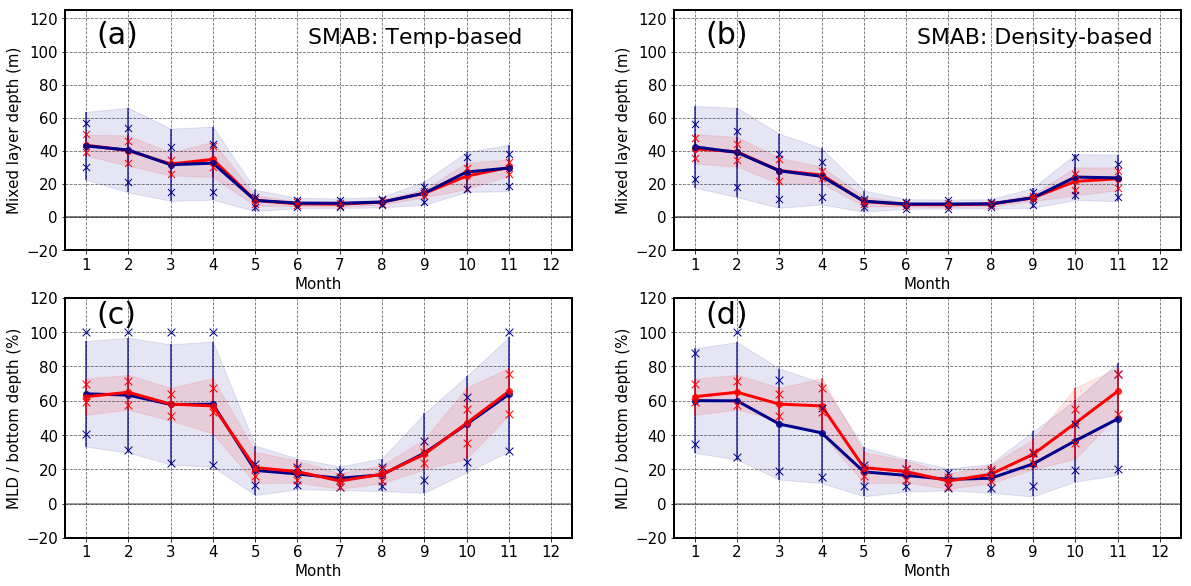

In [333]:
plt.figure(figsize=(20,15))
plt.figure(1)

plt.subplot(321) # P L O T 1
plt.ylim(-20,125)
plt.xlim(0.5,12.5)
plt.plot(month, t_abs_c_mean, linestyle='-', color='red', linewidth=3,alpha = 1, zorder= 30)
plt.scatter(month, t_abs_c_q25, marker = 'x', color='red', s= 50, linewidth=1,alpha = 1, zorder= 60)
plt.scatter(month, t_abs_c_q75, marker = 'x', color='red', s= 50, linewidth=1,alpha = 1, zorder= 60)
plt.fill_between(month, t_abs_c_mean_asarray - t_abs_c_std_asarray, t_abs_c_mean_asarray + t_abs_c_std_asarray,color = 'red', alpha = 0.1,zorder = 30)
plt.errorbar(month,t_abs_c_mean, t_abs_c_std,linestyle='None', marker='o',color='red',alpha= 0.8, markersize=6, zorder = 30)

plt.plot(month, t_abs_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 1, zorder= 30)
plt.scatter(month, t_abs_q25, marker = 'x', color='darkblue', s= 50, linewidth=1,alpha = 1, zorder= 60)
plt.scatter(month, t_abs_q75, marker = 'x', color='darkblue', s= 50, linewidth=1,alpha = 1, zorder= 60)
plt.fill_between(month, t_abs_mean_asarray - t_abs_std_asarray, t_abs_mean_asarray + t_abs_std_asarray,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.errorbar(month,t_abs_mean, t_abs_std,linestyle='None', marker='o',color='darkblue',alpha= 0.8, markersize=6, zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Mixed layer depth (m)', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([-20,0,20,40,60,80,100,120], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',linewidth= 2, alpha = 0.5)
plt.text(6.25, 105, 'SMAB: Temp-based', dict(size=22))
plt.text(1.25, 105, '(a)', dict(size=30))

plt.subplot(322) # P L O T 2
plt.xlim(0.5,12.5)
plt.ylim(-20,125)
plt.plot(month, d_abs_c_mean, linestyle='-', color='red', linewidth=3,alpha = 1, zorder= 30)
plt.scatter(month, d_abs_c_q25, marker = 'x', color='red', s= 50, linewidth=1,alpha = 1, zorder= 60)
plt.scatter(month, d_abs_c_q75, marker = 'x', color='red', s= 50, linewidth=1,alpha = 1, zorder= 60)
plt.fill_between(month, d_abs_c_mean_asarray - d_abs_c_std_asarray, d_abs_c_mean_asarray + d_abs_c_std_asarray,color = 'red', alpha = 0.1,zorder = 30)
plt.errorbar(month,d_abs_c_mean, d_abs_c_std,linestyle='None', marker='o',color='red',alpha= 0.8, markersize=6, zorder = 30)

plt.plot(month, d_abs_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 1, zorder= 30)
plt.scatter(month, d_abs_q25, marker = 'x', color='darkblue', s= 50, linewidth=1,alpha = 1, zorder= 60)
plt.scatter(month, d_abs_q75, marker = 'x', color='darkblue', s= 50, linewidth=1,alpha = 1, zorder= 60)
plt.fill_between(month, d_abs_mean_asarray - d_abs_std_asarray, d_abs_mean_asarray + d_abs_std_asarray,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.errorbar(month,d_abs_mean, d_abs_std,linestyle='None', marker='o',color='darkblue',alpha= 0.8, markersize=6, zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Mixed layer depth (m)', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([-20,0,20,40,60,80,100,120], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',linewidth= 2, alpha = 0.5)
plt.text(6.25, 105, 'SMAB: Density-based', dict(size=22))
plt.text(1.25, 105, '(b)', dict(size=30))

# plt.subplot(323) # P L O T 3
# plt.xlim(0.5,12.5)
# plt.ylim(0,2100)
# plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
# plt.yticks([0,300,600,900,1200,1500,1800,2100], fontsize = 15) 
# plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
# plt.xlabel('Month', fontsize = 15)
# plt.ylabel('Data availability', fontsize = 15)
# plt.bar(month, t_usable, color='darkblue', edgecolor='black', width = 0.6)
# plt.bar(month, t_diff, bottom=t_usable, color='aliceblue', edgecolor='black', width=0.6)
# plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)

# plt.subplot(324) # P L O T 4
# plt.xlim(0.5,12.5)
# plt.ylim(0,2100)
# plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
# plt.yticks([0,300,600,900,1200,1500,1800,2100], fontsize = 15) 
# plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
# plt.xlabel('Month', fontsize = 15)
# plt.ylabel('Data availability', fontsize = 15)
# plt.bar(month, d_usable, color='darkblue', edgecolor='black', width = 0.6)
# plt.bar(month, d_diff, bottom=d_usable, color='aliceblue', edgecolor='black', width=0.6)
# plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)

plt.subplot(323) # P L O T 5
# plt.subplot(325) # P L O T 5
plt.ylim(-20,120)
plt.xlim(0.5,12.5)
plt.plot(month, t_ratio_mean100, linestyle='-', color='darkblue', linewidth=3,alpha = 1, zorder= 30)
plt.scatter(month, t_ratio_q25100, marker = 'x', color='darkblue', s= 60, linewidth=1,alpha = 1, zorder= 60)
plt.scatter(month, t_ratio_q75100, marker = 'x', color='darkblue', s=60, linewidth=1,alpha = 1, zorder= 60)
plt.errorbar(month,t_ratio_mean100, t_ratio_std100,linestyle='None', marker='o',color='darkblue',alpha= 0.8, markersize=6, zorder = 30)
plt.fill_between(month, t_ratio_mean_asarray - t_ratio_std_asarray, t_ratio_mean_asarray + t_ratio_std_asarray,color = 'darkblue', alpha = 0.1,zorder = 30)

plt.plot(month, t_ratio_c_mean100, linestyle='-', color='red', linewidth=3,alpha = 1, zorder= 30)
plt.scatter(month, t_ratio_c_q25100, marker = 'x', color='red', s= 60, linewidth=1,alpha = 1, zorder= 60)
plt.scatter(month, t_ratio_c_q75100, marker = 'x', color='red', s=60, linewidth=1,alpha = 1, zorder= 60)
plt.errorbar(month,t_ratio_c_mean100, t_ratio_c_std100,linestyle='None', marker='o',color='red',alpha= 0.8, markersize=6, zorder = 30)
plt.fill_between(month, t_ratio_c_mean_asarray - t_ratio_c_std_asarray, t_ratio_c_mean_asarray + t_ratio_c_std_asarray,color = 'red', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('MLD / bottom depth (%)', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([-20,0,20,40,60,80,100,120], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(1.25, 105, '(c)', dict(size=30))


plt.subplot(324) # P L O T 6
# plt.subplot(326) # P L O T 6
plt.ylim(-20,120)
plt.xlim(0.5,12.5)
plt.plot(month, d_ratio_mean100, linestyle='-', color='darkblue', linewidth=3,alpha = 1, zorder= 30)
plt.scatter(month, d_ratio_q25100, marker = 'x', color='darkblue', s= 60, linewidth=1,alpha = 1, zorder= 60)
plt.scatter(month, d_ratio_q75100, marker = 'x', color='darkblue', s=60, linewidth=1,alpha = 1, zorder= 60)
plt.errorbar(month,d_ratio_mean100, d_ratio_std100,linestyle='None', marker='o',color='darkblue',alpha= 0.8, markersize=6, zorder = 30)
plt.fill_between(month, d_ratio_mean_asarray - d_ratio_std_asarray, d_ratio_mean_asarray + d_ratio_std_asarray,color = 'darkblue', alpha = 0.1,zorder = 30)

plt.plot(month, t_ratio_c_mean100, linestyle='-', color='red', linewidth=3,alpha = 1, zorder= 30)
plt.scatter(month, t_ratio_c_q25100, marker = 'x', color='red', s= 60, linewidth=1,alpha = 1, zorder= 60)
plt.scatter(month, t_ratio_c_q75100, marker = 'x', color='red', s=60, linewidth=1,alpha = 1, zorder= 60)
plt.errorbar(month,t_ratio_c_mean100, t_ratio_c_std100,linestyle='None', marker='o',color='red',alpha= 0.8, markersize=6, zorder = 30)
plt.fill_between(month, t_ratio_c_mean_asarray - t_ratio_c_std_asarray, t_ratio_c_mean_asarray + t_ratio_c_std_asarray,color = 'red', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('MLD / bottom depth (%)', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([-20,0,20,40,60,80,100,120], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(1.25, 105, '(d)', dict(size=30))


plt.savefig('seasonal_EGoM')
plt.show()

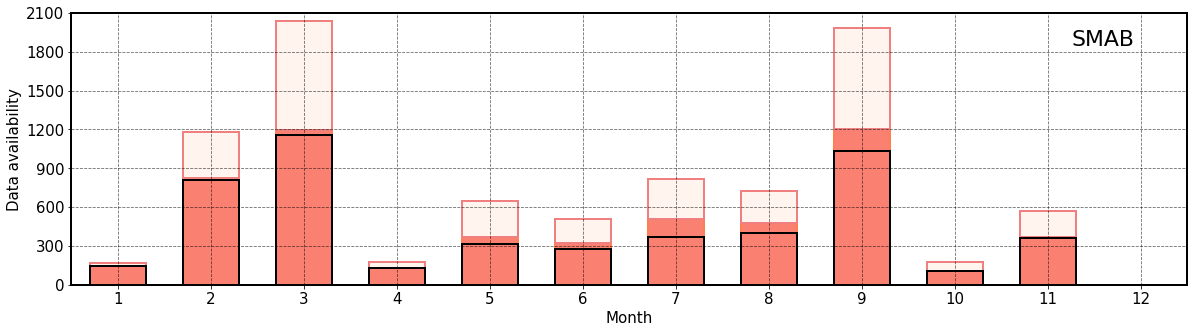

In [335]:
plt.figure(figsize=(20,5))
plt.figure(1)
# plt.xlim(0.5,12.5)
# plt.ylim(0,2100)
# plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
# plt.yticks([0,300,600,900,1200,1500,1800,2100], fontsize = 15) 
# plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
# plt.xlabel('Month', fontsize = 15)
# plt.ylabel('Data availability', fontsize = 15)
# plt.bar(month, t_usable, color='darkblue', edgecolor='black', width = 0.6)
# plt.bar(month, t_diff, bottom=t_usable, color='aliceblue', edgecolor='black', width=0.6)
# plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)

plt.xlim(0.5,12.5)
plt.ylim(0,2100)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([0,300,600,900,1200,1500,1800,2100], fontsize = 15) 
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Data availability', fontsize = 15)
plt.bar(month, t_usable, color='salmon', edgecolor='coral', linewidth = 2, width = 0.6)
plt.bar(month, t_diff, bottom=t_usable, color='seashell', edgecolor='lightcoral', linewidth = 2, width=0.6)
plt.bar(month, d_usable, color='None', edgecolor='black', width = 0.6, linewidth = 2, zorder = 60)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
plt.text(11.25, 1850, 'SMAB', dict(size=22))

plt.savefig('seasonal_EGoM')
plt.show()

In [336]:
ratio_diff = np.asarray([x1 - x2 for (x1, x2) in zip(t_ratio_mean100, d_ratio_mean100)])
ratio_diff_std = np.asarray([x1 - x2 for (x1, x2) in zip(t_ratio_std100, d_ratio_std100)])

ratio_c_diff = [x1 - x2 for (x1, x2) in zip(t_ratio_c_mean100, d_ratio_c_mean100)]
ratio_c_diff_std = np.asarray([x1 - x2 for (x1, x2) in zip(t_ratio_c_std100, d_ratio_c_std100)])


abs_c_diff = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_mean, d_abs_c_mean)])
abs_c_diff_std = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_std, d_abs_c_std)])

abs_diff = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_mean, d_abs_mean)])
abs_diff_std = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_std, d_abs_std)])

In [337]:
print(ratio_diff)
print(np.mean(ratio_diff))
print('')
print(ratio_c_diff)
print(np.mean(ratio_c_diff))
print('')
print(abs_c_diff)
print(np.mean(abs_c_diff))
print('')
print(abs_diff)
print(np.mean(abs_diff))

[ 3.97347571  3.34102908 11.44461883 16.71400719  0.86009093  0.85090335
  0.64696685  2.03693767  6.29491361  9.65612594 14.37130208]
6.380942841705266

[4.872430181242571, 2.442557635174154, 11.742833517816422, 16.898167787918858, 1.4448435226147858, 0.4739614329435966, 0.4835604618534344, 2.065012677567166, 6.098760528463913, 12.735040746073771, 16.07369509594089]
6.848260326146325

[2.17266035 0.72808428 4.01646575 9.4246774  0.67398324 0.40617277
 0.36978089 1.17930473 2.65505361 3.19469697 6.8147815 ]
2.875969225086267

[0.54356484 1.47341791 3.69682925 7.95257279 0.48920011 0.55455244
 0.44499799 1.07111406 2.78196802 3.07883855 5.9356469 ]
2.5475184405056117


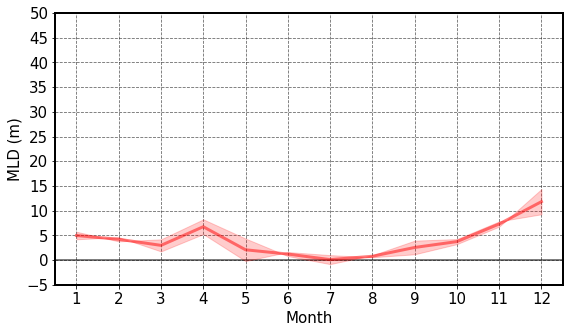

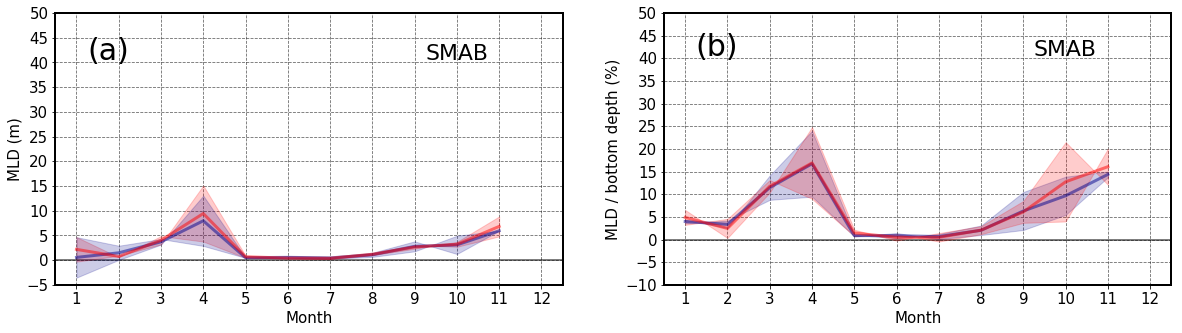

In [339]:
plt.figure(figsize=(20,5))
plt.figure(1)

plt.subplot(121)
plt.ylim(-5,50)
plt.xlim(0.5,12.5)
plt.plot(month, abs_diff, linestyle='-', color='darkblue', linewidth=3,alpha = 0.5, zorder= 30)
plt.plot(month, abs_c_diff, linestyle='-', color='red', linewidth=3,alpha = 0.5, zorder= 30)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([-5,0,5,10,15,20,25,30,35,40,45,50], fontsize = 15) 
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('MLD (m)', fontsize = 15)
plt.axhline(y=0, color='black', linestyle='-',linewidth= 2, alpha = 0.5)
plt.fill_between(month, abs_c_diff - abs_c_diff_std, abs_c_diff + abs_c_diff_std,color = 'red', alpha = 0.2,zorder = 30)
plt.fill_between(month, abs_diff - abs_diff_std, abs_diff + abs_diff_std,color = 'darkblue', alpha = 0.2,zorder = 30)
plt.text(9.25, 40.5, 'SMAB', dict(size=22))
plt.text(1.25, 40.5, '(a)', dict(size=30))


plt.subplot(122)
plt.ylim(-10,50)
plt.xlim(0.5,12.5)
plt.plot(month, ratio_diff, linestyle='-', color='darkblue', linewidth=3,alpha = 0.5, zorder= 30)
plt.plot(month, ratio_c_diff, linestyle='-', color='red', linewidth=3,alpha = 0.5, zorder= 30)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([-10,-5,0,5,10,15,20,25,30,35,40,45,50], fontsize = 15) 
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('MLD / bottom depth (%)', fontsize = 15)
plt.axhline(y=0, color='black', linestyle='-',linewidth= 2, alpha = 0.5)
plt.fill_between(month, ratio_diff - ratio_diff_std, ratio_diff + ratio_diff_std,color = 'darkblue', alpha = 0.2,zorder = 30)
plt.fill_between(month, ratio_c_diff - ratio_c_diff_std, ratio_c_diff + ratio_c_diff_std,color = 'red', alpha = 0.2,zorder = 30)
plt.text(9.25, 40.5, 'SMAB', dict(size=22))
plt.text(1.25, 40.5, '(b)', dict(size=30))
plt.savefig('seasonal_EGoM')
plt.show()

In [340]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]
month_new = [1,2,3,4,5,6,7,8,9,10,11]

In [348]:
d_abs_mean_x=  [44.261538461538464, 38.13005272407733, 27.794585987261147, 25.682835820895523, 10.152610441767068, 9.304347826086957, 6.887931034482759, 8.388461538461538, 14.346869712351946, 22.29394812680115, 30.496969696969696, 41.78048780487805]
array_d_abs_mean_x = np.asarray(d_abs_mean_x)
d_abs_std_x=  [18.027566005833247, 20.655019607128388, 19.46475262859222, 15.545556672458767, 6.7859412913530415, 5.9942911999775355, 1.972970592979277, 5.002216964128307, 7.789955321237922, 12.635663504275293, 15.551526960953499, 14.304207457302853]
array_d_abs_std_x = np.asarray(d_abs_std_x)
d_abs_c_mean_x=  [48.66135129490393, 38.98122621961879, 27.10194874447916, 28.460179789080648, 9.626018246655864, 10.150006455633443, 6.814348672161172, 8.08471531822151, 14.199875849819259, 22.34921729247595, 31.106949119712848, 39.603508771929825]
array_d_abs_c_mean_x = np.asarray(d_abs_c_mean_x)
d_abs_c_std_x=  [11.401730026343996, 11.501141698557191, 10.934267582203343, 9.288503262806348, 2.6061400288919603, 4.002149380268777, 0.8460055436177472, 2.2926864545875265, 4.353555908629032, 5.338934802635864, 7.230314123112538, 8.27543543509976]
array_d_abs_c_std_x = np.asarray(d_abs_c_std_x)

d_abs_mean_v=  [42.394366197183096, 38.978934324659235, 27.877816291161178, 24.559055118110237, 9.53525641025641, 7.813868613138686, 7.806970509383378, 7.9351620947630925, 11.562198649951783, 24.097087378640776, 23.625]
array_d_abs_mean_v = np.asarray(d_abs_mean_v)
d_abs_std_v=  [24.62820944881361, 27.00604920723857, 22.35369866722058, 17.0074803104038, 6.401525303886962, 2.9007344270570745, 2.750628432545776, 2.7535124765947026, 6.044613801934754, 13.865172239297088, 14.096529813318517]
array_d_abs_std_v = np.asarray(d_abs_std_v)
d_abs_c_mean_v=  [41.18097860791826, 39.40649046790143, 27.990836704857966, 25.369307692307693, 9.338449766903913, 7.501564077551284, 7.3946797841023, 7.775943111180119, 11.577268568611348, 21.501907001044934, 23.103191139875538]
array_d_abs_c_mean_v = np.asarray(d_abs_c_mean_v)
d_abs_c_std_v=  [8.801982286134864, 8.966199617177182, 7.724028550304355, 4.980559843534619, 2.9583612355527196, 1.2461921462057928, 1.3852946095974816, 1.2753362344087815, 2.0306952676415646, 8.409098130683525, 6.8875821017656005]
array_d_abs_c_std_v = np.asarray(d_abs_c_std_v)

d_abs_mean_t=  [71.56024096385542, 72.7056, 46.6627027027027, 22.416972972972975, 12.360543337645538, 9.588235294117647, 7.351351351351352, 7.834375, 12.269709543568466, 20.6857855361596, 30.292713567839197, 37.793103448275865]
array_d_abs_mean_t = np.asarray(d_abs_mean_t)
d_abs_std_t=  [37.85935430479066, 41.517755823743656, 42.43650981959251, 20.464840343783944, 8.715631566255196, 5.25615116019369, 2.4628725945717873, 3.113590107797589, 6.397765714661756, 10.922656638403305, 18.21758488848653, 19.237856555535686]
array_d_abs_std_t = np.asarray(d_abs_std_t)
d_abs_c_mean_t=  [78.03203036279959, 73.53574804529242, 47.382479557479556, 23.294586432719015, 13.137129320150612, 9.867960225861694, 7.5300814000814, 7.841594508152076, 13.917184828007779, 21.393340578297003, 30.31755305445674, 28.21045943304008]
array_d_abs_c_mean_t = np.asarray(d_abs_c_mean_t)
d_abs_c_std_t=  [21.86766936154572, 23.409284992476564, 24.789553498603215, 8.782550482027169, 5.552413585115152, 2.772138883332934, 1.341694355784547, 1.1195258813667583, 5.8714902039481185, 4.401840498227291, 7.982790733944767, 12.883216166606223]
array_d_abs_c_std_t = np.asarray(d_abs_c_std_t)

d_abs_mean_y=  [36.73066666666667, 49.967213114754095, 36.601724137931036, 22.226521060842433, 13.834529147982062, 10.607692307692307, 8.1875, 8.25278810408922, 12.313432835820896, 22.660208643815203, 28.46446700507614, 30.0]
array_d_abs_mean_y = np.asarray(d_abs_mean_y)
d_abs_std_y=  [22.575059827655434, 32.65914488611555, 24.81570339439088, 16.89298837931649, 8.224671439880956, 8.752029350469483, 3.3270122357254213, 4.015217525910512, 12.881444430020181, 12.883203842140235, 16.045620442220827, 5.138093031466052]
array_d_abs_std_y = np.asarray(d_abs_std_y)
d_abs_c_mean_y=  [37.4054788961039, 49.02433281004709, 36.287373737373734, 22.393759153309315, 14.620187848986397, 10.207197940891911, 7.5814393939393945, 8.259105184269117, 12.078413764904102, 21.823298262986924, 28.840066267937043, 30.0]
array_d_abs_c_mean_y = np.asarray(d_abs_c_mean_y)
d_abs_c_std_y=  [8.243153418213403, 20.377836772076403, 10.433328461159157, 6.247426041016723, 4.616539270465489, 2.923701645361102, 1.7682912802710025, 1.4091224864949916, 4.736405481501757, 7.330353390150115, 8.027020540647317, 0.0]
array_d_abs_c_std_y = np.asarray(d_abs_c_std_y)

d_abs_mean_w=  [49.87157622739018, 47.81428571428572, 47.9168880455408, 37.600115942028985, 25.501875, 22.676666666666666, 14.195266272189349, 16.314763231197773, 17.703125, 26.437898089171973, 33.990625, 37.518181818181816]
array_d_abs_mean_w = np.asarray(d_abs_mean_w)
d_abs_std_w=  [22.95746473200366, 25.04797707131999, 23.032822866838753, 23.98876355292518, 22.123532075244565, 20.827629352483793, 15.459539903940385, 16.422924148019746, 15.395832452356762, 17.688681563490885, 20.179272462340535, 19.74599237506267]
array_d_abs_std_w = np.asarray(d_abs_std_w)
d_abs_c_mean_w=  [45.83823674901097, 42.75448276959393, 46.41360855402116, 35.87923949936301, 25.241292717835513, 24.726529068906103, 11.124369348628115, 15.406051341171842, 18.0617233106939, 25.85403515317611, 33.39530639725829, 30.3231981981982]
array_d_abs_c_mean_w = np.asarray(d_abs_c_mean_w)
d_abs_c_std_w=  [12.327934616773906, 14.224494140418363, 7.840212850517012, 5.526455694639437, 10.157342482158723, 8.168108234836529, 6.030907418129967, 3.236505794550853, 6.132745233153801, 4.907529527038556, 7.376068493946898, 10.025220321222648]
array_d_abs_c_std_w = np.asarray(d_abs_c_std_w)

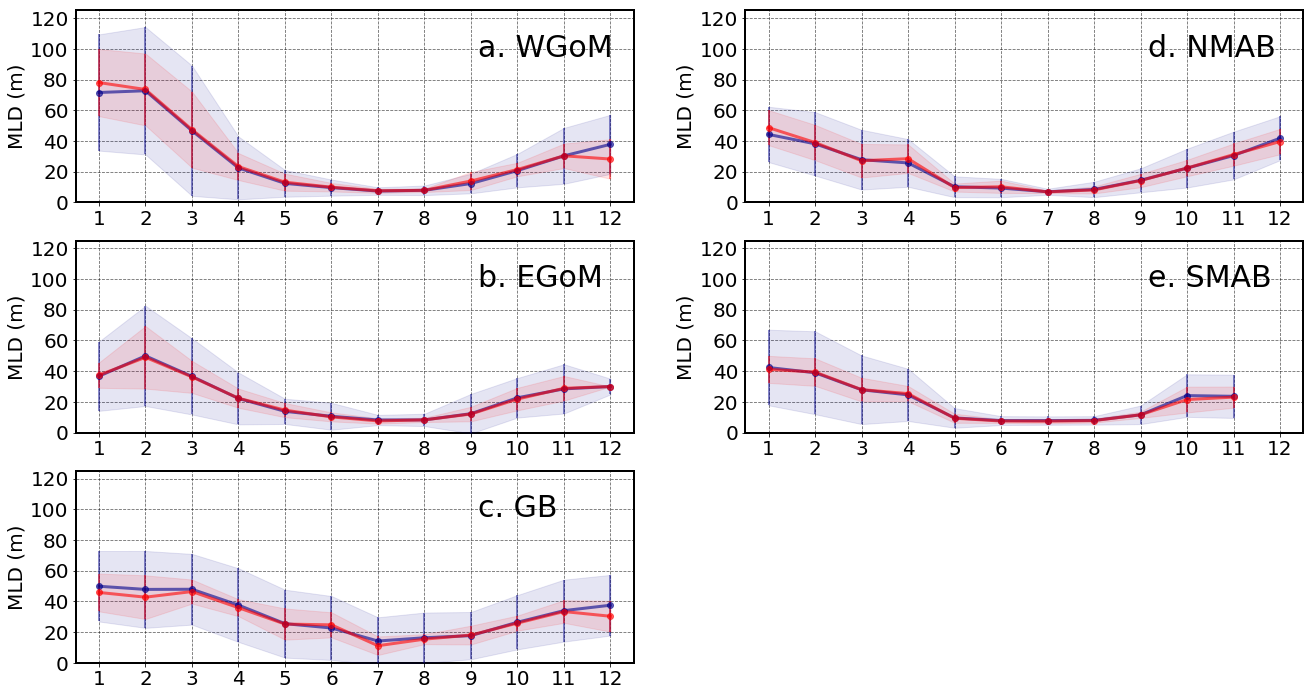

In [559]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(22,12))
plt.figure(1)

plt.subplot(321) # Western Gulf of Maine
plt.ylim(0,125)
plt.xlim(0.5,12.5)
plt.plot(month, d_abs_mean_t, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,d_abs_mean_t, d_abs_std_t,linestyle='None', marker='o',color='darkblue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month, array_d_abs_mean_t - array_d_abs_std_t, array_d_abs_mean_t + array_d_abs_std_t,color = 'darkblue', alpha = 0.1,zorder = 30)

plt.plot(month, d_abs_c_mean_t, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,d_abs_c_mean_t, d_abs_c_std_t,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month, array_d_abs_c_mean_t - array_d_abs_c_std_t, array_d_abs_c_mean_t + array_d_abs_c_std_t,color = 'red', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 20) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 20) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(9.15, 95, 'a. WGoM', dict(size=30))
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)

plt.subplot(322) # Northern MAB
plt.ylim(0,125)
plt.xlim(0.5,12.5)
plt.plot(month, d_abs_mean_x, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,d_abs_mean_x, d_abs_std_x,linestyle='None', marker='o',color='darkblue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month, array_d_abs_mean_x - array_d_abs_std_x, array_d_abs_mean_x + array_d_abs_std_x,color = 'darkblue', alpha = 0.1,zorder = 30)

plt.plot(month, d_abs_c_mean_x, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,d_abs_c_mean_x, d_abs_c_std_x,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month, array_d_abs_c_mean_x - array_d_abs_c_std_x, array_d_abs_c_mean_x + array_d_abs_c_std_x,color = 'red', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 20) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 20) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(9.15, 95, 'd. NMAB', dict(size=30))
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)

# # verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
plt.subplot(323) # Eastern Gulf of Maine
plt.ylim(0,125)
plt.xlim(0.5,12.5)
plt.plot(month, d_abs_mean_y, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,d_abs_mean_y, d_abs_std_y,linestyle='None', marker='o',color='darkblue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month, array_d_abs_mean_y - array_d_abs_std_y, array_d_abs_mean_y + array_d_abs_std_y,color = 'darkblue', alpha = 0.1,zorder = 30)

plt.plot(month, d_abs_c_mean_y, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,d_abs_c_mean_y, d_abs_c_std_y,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month, array_d_abs_c_mean_y - array_d_abs_c_std_y, array_d_abs_c_mean_y + array_d_abs_c_std_y,color = 'red', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 20) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 20) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(9.15, 95, 'b. EGoM', dict(size=30))
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)

plt.subplot(324) # Southern MAB
plt.ylim(0,125)
plt.xlim(0.5,12.5)
plt.plot(month_new, d_abs_mean_v, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month_new,d_abs_mean_v, d_abs_std_v,linestyle='None', marker='o',color='darkblue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month_new, array_d_abs_mean_v - array_d_abs_std_v, array_d_abs_mean_v + array_d_abs_std_v,color = 'darkblue', alpha = 0.1,zorder = 30)

plt.plot(month_new, d_abs_c_mean_v, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month_new,d_abs_c_mean_v, d_abs_c_std_v,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month_new, array_d_abs_c_mean_v - array_d_abs_c_std_v, array_d_abs_c_mean_v + array_d_abs_c_std_v,color = 'red', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 20) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 20) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(9.15, 95, 'e. SMAB', dict(size=30))
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)

plt.subplot(325) # Georges Bank
plt.ylim(0,125)
plt.xlim(0.5,12.5)
plt.plot(month, d_abs_mean_w, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,d_abs_mean_w, d_abs_std_w,linestyle='None', marker='o',color='darkblue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month, array_d_abs_mean_w - array_d_abs_std_w, array_d_abs_mean_w + array_d_abs_std_w,color = 'darkblue', alpha = 0.1,zorder = 30)

plt.plot(month, d_abs_c_mean_w, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,d_abs_c_mean_w, d_abs_c_std_w,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month, array_d_abs_c_mean_w - array_d_abs_c_std_w, array_d_abs_c_mean_w + array_d_abs_c_std_w,color = 'red', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 20) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 20) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(9.15, 95, 'c. GB', dict(size=30))
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)

plt.savefig('seasonal_EGoM')


# plt.subplot(326)
# # plt.plot(month, mld_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 1, zorder= 30)
# plt.axhline(y=0, color='white', linestyle='-',alpha = 0.5)
plt.savefig('clim_seasonalcycle')

plt.show()

In [487]:
t_abs_c_mean_v=  [43.353638953638956, 40.13457474854354, 32.00730245357875, 34.793985095364405, 10.012433006223366, 7.907736842579605, 7.764460669914881, 8.955247839114621, 14.232322181455475, 24.6966039707419, 29.917972637048216]
t_abs_c_std_v=  [6.308167856206571, 9.11289139767773, 6.878673133404334, 10.652666241707898, 3.1815265927093406, 1.3130896266947265, 1.5433648692019653, 1.4717621781321175, 2.377909348274622, 7.914526325922757, 4.869746963103676]
d_abs_c_mean_v=  [41.18097860791826, 39.40649046790143, 27.990836704857966, 25.369307692307693, 9.338449766903913, 7.501564077551284, 7.3946797841023, 7.775943111180119, 11.577268568611348, 21.501907001044934, 23.103191139875538]
d_abs_c_std_v=  [8.801982286134864, 8.966199617177182, 7.724028550304355, 4.980559843534619, 2.9583612355527196, 1.2461921462057928, 1.3852946095974816, 1.2753362344087815, 2.0306952676415646, 8.409098130683525, 6.8875821017656005]

In [488]:
abs_c_diff_v = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_mean_v, d_abs_c_mean_v)])
abs_c_diff_std_v = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_std_v, d_abs_c_std_v)])

In [489]:
t_abs_c_mean_x=  [52.67151014328273, 41.45218256773642, 32.33645888646196, 33.865309571893626, 11.241295075552504, 10.655513336277266, 7.337869769119768, 8.851221970364168, 16.988462024560818, 25.924006816407804, 35.87996745695565, 38.08998968008256]
t_abs_c_std_x=  [17.528539880468568, 9.544260348502783, 10.516153002359076, 12.33908122733314, 3.8760570892136963, 4.826613271052373, 0.8470430142847104, 2.2639573327781517, 4.522371663473388, 6.548672862360122, 6.50835255409061, 9.971191434194013]
d_abs_c_mean_x=  [48.66135129490393, 38.98122621961879, 27.10194874447916, 28.460179789080648, 9.626018246655864, 10.150006455633443, 6.814348672161172, 8.08471531822151, 14.199875849819259, 22.34921729247595, 31.106949119712848, 39.603508771929825]
d_abs_c_std_x=  [11.401730026343996, 11.501141698557191, 10.934267582203343, 9.288503262806348, 2.6061400288919603, 4.002149380268777, 0.8460055436177472, 2.2926864545875265, 4.353555908629032, 5.338934802635864, 7.230314123112538, 8.27543543509976]

In [490]:
abs_c_diff_x = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_mean_x, d_abs_c_mean_x)])
abs_c_diff_std_x = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_std_x, d_abs_c_std_x)])

In [491]:
t_abs_c_mean_t=  [88.69191065344911, 81.4272334612341, 55.43419913419913, 30.331283090153818, 14.403109588279593, 10.866001611099493, 8.01384008148714, 8.790893336574184, 15.363889386749008, 26.921520009591124, 45.010955330807995, 57.70115798180314]
t_abs_c_std_t=  [19.38677272491629, 14.348387985238986, 20.186952578205048, 11.655063395733992, 5.295171436125374, 3.2699259450939326, 1.7949382813171544, 1.727297124448786, 8.465691739685372, 5.26189286811155, 11.51850503523736, 20.507972483182908]
d_abs_c_mean_t=  [78.03203036279959, 73.53574804529242, 47.382479557479556, 23.294586432719015, 13.137129320150612, 9.867960225861694, 7.5300814000814, 7.841594508152076, 13.917184828007779, 21.393340578297003, 30.31755305445674, 28.21045943304008]
d_abs_c_std_t=  [21.86766936154572, 23.409284992476564, 24.789553498603215, 8.782550482027169, 5.552413585115152, 2.772138883332934, 1.341694355784547, 1.1195258813667583, 5.8714902039481185, 4.401840498227291, 7.982790733944767, 12.883216166606223]

In [492]:
abs_c_diff_t = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_mean_t, d_abs_c_mean_t)])
abs_c_diff_std_t = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_std_t, d_abs_c_std_t)])

In [494]:
t_abs_c_mean_y=  [46.39429112554112, 54.103628117913836, 45.4523211708926, 35.73923211782334, 19.27198132409865, 11.221688291229878, 8.675042441218912, 9.184063509154033, 15.009141753740463, 30.662046680713786, 47.59578796151856, 32.6]
t_abs_c_std_y=  [10.101296258150157, 17.049033767109663, 6.528433218171732, 8.555473888214536, 7.337612395052912, 2.835522224922375, 2.9766666739157985, 1.8756603184025056, 6.4443851175625895, 10.165980487147607, 17.725006021756165, 0.0]
d_abs_c_mean_y=  [37.4054788961039, 49.02433281004709, 36.287373737373734, 22.393759153309315, 14.620187848986397, 10.207197940891911, 7.5814393939393945, 8.259105184269117, 12.078413764904102, 21.823298262986924, 28.840066267937043, 30.0]
d_abs_c_std_y=  [8.243153418213403, 20.377836772076403, 10.433328461159157, 6.247426041016723, 4.616539270465489, 2.923701645361102, 1.7682912802710025, 1.4091224864949916, 4.736405481501757, 7.330353390150115, 8.027020540647317, 0.0]

In [572]:
t_abs_mean_little = [47.59578796151856, 32.6]
t_abs_std_little = [17.725006021756165, 0.0]
d_abs_mean_little = [28.840066267937043, 30.0]
d_abs_std_little = [8.027020540647317, 0.0]

In [573]:
abs_c_diff_y_little = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_mean_little, d_abs_mean_little)])
abs_c_diff_std_y_little = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_std_little, d_abs_std_little)])

In [568]:
t_abs_c_mean_y_small=  [46.39429112554112, 54.103628117913836, 45.4523211708926, 35.73923211782334, 19.27198132409865, 11.221688291229878, 8.675042441218912, 9.184063509154033, 15.009141753740463, 30.662046680713786, 47.59578796151856]
t_abs_c_std_y_small=  [10.101296258150157, 17.049033767109663, 6.528433218171732, 8.555473888214536, 7.337612395052912, 2.835522224922375, 2.9766666739157985, 1.8756603184025056, 6.4443851175625895, 10.165980487147607, 17.725006021756165]
d_abs_c_mean_y_small=  [37.4054788961039, 49.02433281004709, 36.287373737373734, 22.393759153309315, 14.620187848986397, 10.207197940891911, 7.5814393939393945, 8.259105184269117, 12.078413764904102, 21.823298262986924, 28.840066267937043]
d_abs_c_std_y_small=  [8.243153418213403, 20.377836772076403, 10.433328461159157, 6.247426041016723, 4.616539270465489, 2.923701645361102, 1.7682912802710025, 1.4091224864949916, 4.736405481501757, 7.330353390150115, 8.027020540647317]

In [569]:
abs_c_diff_y_small = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_mean_y_small, d_abs_c_mean_y_small)])
abs_c_diff_std_y_small = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_std_y_small, d_abs_c_std_y_small)])

In [495]:
abs_c_diff_y = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_mean_y, d_abs_c_mean_y)])
abs_c_diff_std_y = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_std_y, d_abs_c_std_y)])

In [496]:
t_abs_c_mean_w=  [50.81223507178165, 46.96654829287201, 49.39379513285774, 42.62948757430404, 27.326566006783185, 25.9474421326272, 11.221062886280556, 16.184439168657207, 20.615322808242208, 29.5973528452567, 40.70081663267048, 42.146845486258826]
t_abs_c_std_w=  [13.093112298141092, 13.797205604698286, 9.06475759413219, 7.019152558165635, 12.431958079375937, 7.762007161735555, 5.119069167053538, 3.442094399522526, 7.513181309191118, 5.421145764332937, 7.903338996353795, 7.4764231984613145]
d_abs_c_mean_w=  [45.83823674901097, 42.75448276959393, 46.41360855402116, 35.87923949936301, 25.241292717835513, 24.726529068906103, 11.124369348628115, 15.406051341171842, 18.0617233106939, 25.85403515317611, 33.39530639725829, 30.3231981981982]
d_abs_c_std_w=  [12.327934616773906, 14.224494140418363, 7.840212850517012, 5.526455694639437, 10.157342482158723, 8.168108234836529, 6.030907418129967, 3.236505794550853, 6.132745233153801, 4.907529527038556, 7.376068493946898, 10.025220321222648]

In [497]:
abs_c_diff_w = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_mean_w, d_abs_c_mean_w)])
abs_c_diff_std_w = np.asarray([x1 - x2 for (x1, x2) in zip(t_abs_c_std_w, d_abs_c_std_w)])

In [501]:
month_small = [1,2,3,4,5,6,7,8,9,10,11]

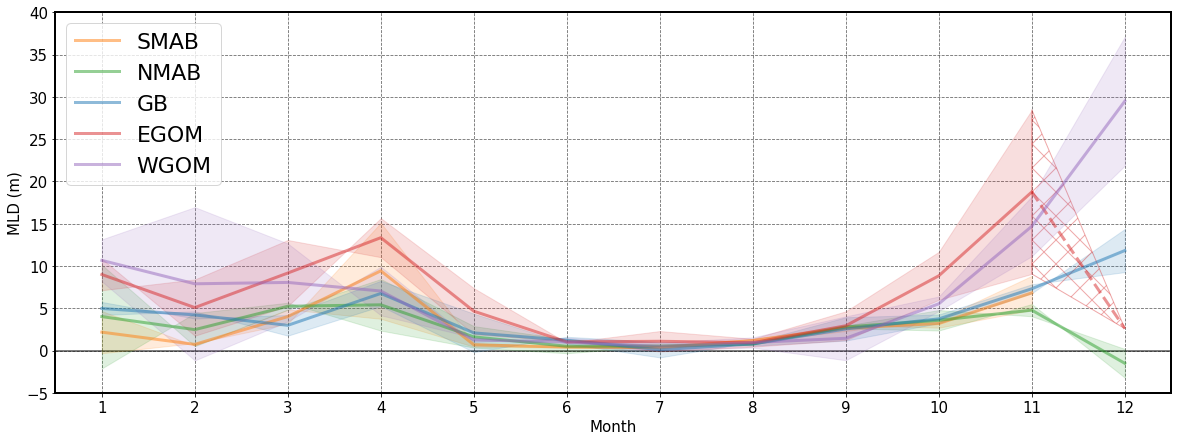

In [585]:
plt.figure(figsize=(20,7))
plt.figure(1)

# plt.subplot(121)
plt.ylim(-5,40)
plt.xlim(0.5,12.5)
plt.plot(month_small, abs_c_diff_v, linestyle='-', color='tab:orange', linewidth=3,alpha = 0.5, zorder= 30, label = 'SMAB')
plt.fill_between(month_small, abs_c_diff_v - abs_c_diff_std_v, abs_c_diff_v + abs_c_diff_std_v,color = 'tab:orange', alpha = 0.15,zorder = 30)

plt.plot(month, abs_c_diff_x, linestyle='-', color='tab:green', linewidth=3,alpha = 0.5, zorder= 30,label = 'NMAB')
plt.fill_between(month, abs_c_diff_x - abs_c_diff_std_x, abs_c_diff_x + abs_c_diff_std_x,color = 'tab:green', alpha = 0.15,zorder = 30)

plt.plot(month, abs_c_diff_w, linestyle='-', color='tab:blue', linewidth=3,alpha = 0.5, zorder= 30, label = 'GB')
plt.fill_between(month, abs_c_diff_w - abs_c_diff_std_w, abs_c_diff_w + abs_c_diff_std_w,color = 'tab:blue', alpha = 0.15,zorder = 30)

plt.plot(month_small, abs_c_diff_y_small, linestyle='-', color='tab:red', linewidth=3,alpha = 0.5, zorder= 30, label = 'EGOM')
plt.fill_between(month_small, abs_c_diff_y_small - abs_c_diff_std_y_small, abs_c_diff_y_small + abs_c_diff_std_y_small,color = 'tab:red', alpha = 0.15,zorder = 30)

plt.plot([11,12], abs_c_diff_y_little, linestyle='--', color='tab:red', linewidth=3,alpha = 0.5, zorder= 30)
plt.fill_between([11,12], abs_c_diff_y_little - abs_c_diff_std_y_little, abs_c_diff_y_little + abs_c_diff_std_y_little,facecolor='none', hatch="X", edgecolor="tab:red", alpha = 0.4,zorder = 30)
# plt.plot(month, abs_c_diff_y, linestyle='-', color='tab:red', linewidth=3,alpha = 0.5, zorder= 30, label = 'EGOM')
# plt.fill_between(month, abs_c_diff_y - abs_c_diff_std_y, abs_c_diff_y + abs_c_diff_std_y,color = 'tab:red', alpha = 0.15,zorder = 30)

plt.plot(month, abs_c_diff_t, linestyle='-', color='tab:purple', linewidth=3,alpha = 0.5, zorder= 30, label = 'WGOM')
plt.fill_between(month, abs_c_diff_t - abs_c_diff_std_t, abs_c_diff_t + abs_c_diff_std_t,color = 'tab:purple', alpha = 0.15,zorder = 30)

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([-5,0,5,10,15,20,25,30,35,40], fontsize = 15) 
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('MLD (m)', fontsize = 15)
plt.axhline(y=0, color='black', linestyle='-',linewidth= 2, alpha = 0.5)
plt.legend(loc='upper left', fontsize = 22)

plt.savefig('seasonal_EGoM')

plt.show()

In [566]:
print(d_usable_w)
print('')
print(d_usable_t)
print('')
print(d_usable_y)
print('')
print(d_usable_v)
print('')
print(d_usable_x)

[387, 868, 527, 1725, 1600, 900, 338, 1077, 384, 1256, 640, 110]

[166, 250, 185, 925, 773, 391, 74, 320, 482, 1203, 796, 58]

[75, 122, 58, 641, 223, 260, 48, 269, 268, 671, 394, 5]

[142, 807, 1154, 127, 312, 274, 373, 401, 1037, 103, 360]

[130, 569, 628, 268, 249, 207, 116, 260, 591, 347, 330, 41]


In [557]:
print(abs_c_diff_y)

[ 8.98881223  5.07929531  9.16494743 13.34547296  4.65179348  1.01449035
  1.09360305  0.92495832  2.93072799  8.83874842 18.75572169  2.6       ]


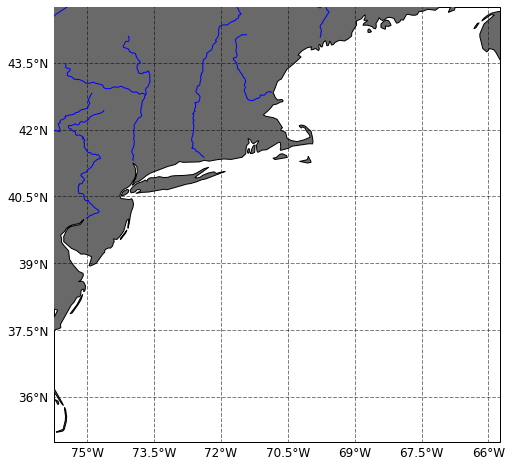

In [549]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)
rivers = cartopy.feature.NaturalEarthFeature(
    category='physical', name='rivers_lake_centerlines',
    scale='10m', facecolor='none', edgecolor='blue')

# fig, ax = plt.subplots(
#     nrows=1, ncols=1, subplot_kw={'projection': ccrs.PlateCarree()},
#                          figsize=(10,6))
ax.add_feature(rivers, linewidth=1, zorder=60)
ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())
mpl.rcParams['axes.linewidth'] = 2

plt.show()

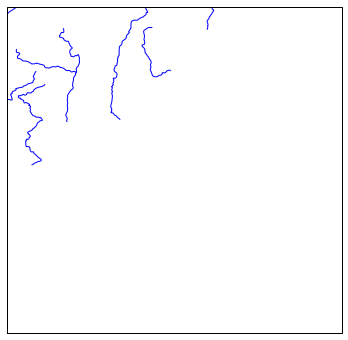

In [537]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature

rivers = cartopy.feature.NaturalEarthFeature(
    category='physical', name='rivers_lake_centerlines',
    scale='10m', facecolor='none', edgecolor='blue')

fig, ax = plt.subplots(
    nrows=1, ncols=1, subplot_kw={'projection': ccrs.PlateCarree()},
                         figsize=(10,6))
ax.add_feature(rivers, linewidth=1)
ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())

plt.show()